## Importing libraries

In [812]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as svs
sns.set(style = 'whitegrid')
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Importing dataset

In [2]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [5]:
df.shape

(12043, 23)

- We can see that the dataset has 23 features with 12043 data-points. 
- There are various data-types in the features - objetct, int, float and datetime.

## EDA

In [6]:
df.isna().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

- We can see that a total of 7 features are having missing values.

In [7]:
df.card_present_flag.value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

In [8]:
df.bpay_biller_code.value_counts()

0                                        883
 LAND WATER & PLANNING East Melbourne      1
 THE DISCOUNT CHEMIST GROUP                1
Name: bpay_biller_code, dtype: int64

In [9]:
df.merchant_id.value_counts()

106e1272-44ab-4dcb-a438-dd98e0071e51    14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f    12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f    11
aef30de1-c67e-4ab7-8577-2931a4bf3c7e    10
6ddddc40-5b69-4253-8a26-167999a8bf96    10
                                        ..
e5aa64b5-d1a4-4b77-b3cc-12fb61481e9c     1
d1e48030-c897-4e93-a7df-af25ff433496     1
d91b753b-1b0a-4426-b2d1-4b7c1fce0c06     1
7c94cdd9-dbe9-433a-bbb8-ea81e447b432     1
36f8720a-f8ff-47d0-bc9e-12f89017fb96     1
Name: merchant_id, Length: 5725, dtype: int64

In [10]:
df.merchant_code.value_counts()

0.0    883
Name: merchant_code, dtype: int64

In [11]:
df.merchant_suburb.value_counts()

Melbourne        255
Sydney           233
Southport         82
Brisbane City     79
Chatswood         55
                ... 
Maddingley         1
Park Holme         1
Kirribilli         1
Woombye            1
Aspley             1
Name: merchant_suburb, Length: 1609, dtype: int64

In [12]:
df.merchant_state.value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [13]:
df.merchant_long_lat.value_counts()

151.21 -33.87    145
144.96 -37.82     85
144.97 -37.81     59
144.96 -37.81     56
153.02 -27.47     46
                ... 
151.2 -33.85       1
145.21 -38.01      1
151.08 -33.93      1
147.52 -41.16      1
148.24 -20         1
Name: merchant_long_lat, Length: 2703, dtype: int64

In [14]:
df.isna().mean()

status               0.000000
card_present_flag    0.359213
bpay_biller_code     0.926513
account              0.000000
currency             0.000000
long_lat             0.000000
txn_description      0.000000
merchant_id          0.359213
merchant_code        0.926679
first_name           0.000000
balance              0.000000
date                 0.000000
gender               0.000000
age                  0.000000
merchant_suburb      0.359213
merchant_state       0.359213
extraction           0.000000
amount               0.000000
transaction_id       0.000000
country              0.000000
customer_id          0.000000
merchant_long_lat    0.359213
movement             0.000000
dtype: float64

- Since the features bpay_biller_code and merchant_code are having more than 90% missing values, we will be dropping them.

In [15]:
df.drop(columns = ['bpay_biller_code', 'merchant_code'], axis = 1, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   account            12043 non-null  object        
 3   currency           12043 non-null  object        
 4   long_lat           12043 non-null  object        
 5   txn_description    12043 non-null  object        
 6   merchant_id        7717 non-null   object        
 7   first_name         12043 non-null  object        
 8   balance            12043 non-null  float64       
 9   date               12043 non-null  datetime64[ns]
 10  gender             12043 non-null  object        
 11  age                12043 non-null  int64         
 12  merchant_suburb    7717 non-null   object        
 13  merchant_state     7717 non-null   object        
 14  extrac

- We see that all the features having missing values are categorical features.
- Since the missing fetures constitute to about 36% of the total values, we can set it as a new category.

In [17]:
df.fillna('Not available', inplace = True)

In [18]:
df.isna().sum()

status               0
card_present_flag    0
account              0
currency             0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
country              0
customer_id          0
merchant_long_lat    0
movement             0
dtype: int64

- Now our dataset doesn't have any missing data

## Insights from the data

## Univariate analysis

### Status

In [19]:
df.status.describe()

count          12043
unique             2
top       authorized
freq            7717
Name: status, dtype: object

In [20]:
df.status.value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

In [21]:
df.status.value_counts(normalize = True)

authorized    0.640787
posted        0.359213
Name: status, dtype: float64

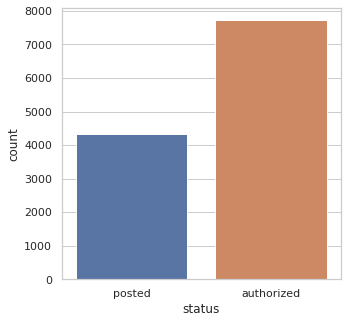

In [22]:
fig = plt.figure(figsize = (5,5))
ax = sns.countplot(df.status, order = df.status.value_counts(ascending = True).index)

- We can see that 'authorized' is 64% and 'posted' is 36% of the data.

### card_present_flag

In [23]:
df.card_present_flag.describe()

count     12043.0
unique        3.0
top           1.0
freq       6194.0
Name: card_present_flag, dtype: float64

In [24]:
df.card_present_flag.value_counts()

1.0              6194
Not available    4326
0.0              1523
Name: card_present_flag, dtype: int64

In [25]:
df.card_present_flag.value_counts(normalize = True)

1.0              0.514324
Not available    0.359213
0.0              0.126464
Name: card_present_flag, dtype: float64

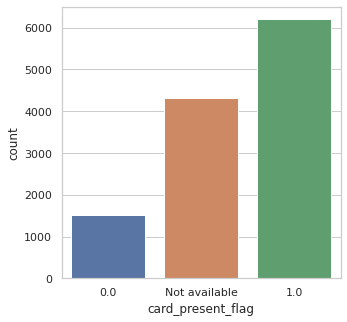

In [26]:
fig = plt.figure(figsize = (5,5))
ax = sns.countplot(df.card_present_flag, order = df.card_present_flag.value_counts(ascending = True).index)

- Around 51% of values are 1, 13% of values are 0.
- 36% of values are not availabe (were missing values).

### account

In [27]:
df.account.describe()

count              12043
unique               100
top       ACC-1598451071
freq                 578
Name: account, dtype: object

In [28]:
df.account.value_counts()

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

In [29]:
df.account.value_counts(normalize = True)

ACC-1598451071    0.047995
ACC-1222300524    0.025160
ACC-182446574     0.024246
ACC-4258502723    0.021589
ACC-1037050564    0.021506
                    ...   
ACC-1998563091    0.003321
ACC-3881031190    0.003072
ACC-721712940     0.002823
ACC-4059612845    0.002574
ACC-1217063613    0.002076
Name: account, Length: 100, dtype: float64

In [30]:
df.account.value_counts().describe([0.25, 0.5, 0.75, 0.9])

count    100.000000
mean     120.430000
std       74.463231
min       25.000000
25%       77.750000
50%      109.500000
75%      141.750000
90%      202.100000
max      578.000000
Name: account, dtype: float64

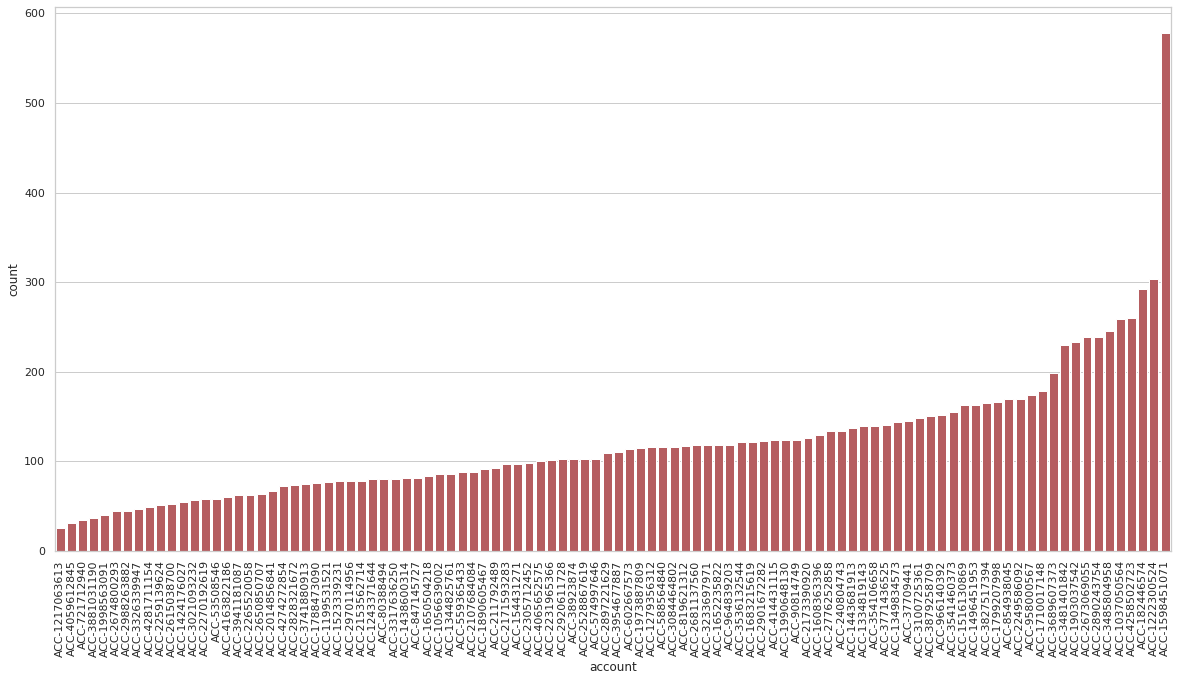

In [31]:
fig = plt.figure(figsize = (20,10))
ax = sns.countplot(df.account, order = df.account.value_counts(ascending = True).index, color = 'r')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

- There are 100 unique accounts.
- All the accounts are having multiple transactions.
- The maximum transactions from a single account is 578, constituting 4% of the data.
- The average no. of transaction per account is found to be 120.
- Around 90% of the data are having max. no. of transactions 200.

### currency

In [32]:
df.currency.describe()

count     12043
unique        1
top         AUD
freq      12043
Name: currency, dtype: object

- Since all the entries are having AUD, we can drop the column.

In [33]:
df.drop(columns = 'currency', inplace = True)

### long_lat

In [34]:
df.long_lat.describe()

count             12043
unique              100
top       153.41 -27.95
freq                578
Name: long_lat, dtype: object

In [35]:
df.long_lat.value_counts()

153.41 -27.95    578
151.23 -33.94    303
116.06 -32.00    292
145.45 -37.74    260
153.10 -27.66    259
                ... 
149.03 -35.25     40
149.19 -21.15     37
145.09 -37.82     34
130.98 -12.49     31
147.61 -37.82     25
Name: long_lat, Length: 100, dtype: int64

In [36]:
df.groupby('long_lat').account.nunique()

long_lat
114.62 -28.80     1
115.72 -32.28     1
115.74 -31.72     1
115.78 -31.90     1
115.79 -31.79     1
                 ..
153.10 -27.66     1
153.32 -27.93     1
153.41 -27.95     1
153.41 -28.01     1
255.00 -573.00    1
Name: account, Length: 100, dtype: int64

<AxesSubplot:xlabel='account', ylabel='count'>

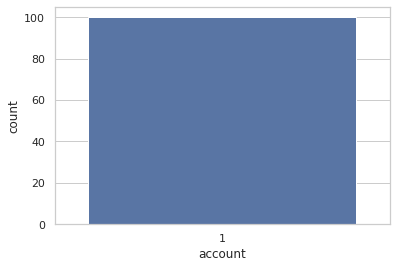

In [37]:
sns.countplot(df.groupby('long_lat').account.nunique())

- We can see that each account is having a unique long_lat.
- No 2 accounts are from the same location.
- We can try plotting the coordinates to get the location of the users.
- We have to seperate the logitude and latitude into two seperate features.

In [38]:
df['longitude'] = df.long_lat.str.split(expand = True).iloc[:,0]

In [39]:
df['latitude'] = df.long_lat.str.split(expand = True).iloc[:,1]

In [40]:
BBox = ((df.longitude.min(), df.longitude.max()), (df.latitude.min(), df.latitude.max()))

In [41]:
BBox

(('114.62', '255.00'), ('-12.37', '-573.00'))

In [42]:
df.loc[df.latitude == '-573.00']

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,longitude,latitude
47,authorized,0,ACC-2901672282,255.00 -573.00,SALES-POS,7ce5471b-363c-46ab-b398-ca517347829a,Daniel,1290.08,2018-08-01,M,...,NSW,2018-08-01T10:27:08.000+0000,31.62,826f09d26daf4b7282f597cabfecaf81,Australia,CUS-1617121891,151.21 -33.87,debit,255.00,-573.00
51,posted,Not available,ACC-2901672282,255.00 -573.00,PAYMENT,Not available,Daniel,1195.08,2018-08-01,M,...,Not available,2018-08-01T11:00:00.000+0000,95.00,62e49c215d7e45609556936fd7e860ce,Australia,CUS-1617121891,Not available,debit,255.00,-573.00
99,posted,Not available,ACC-2901672282,255.00 -573.00,PAYMENT,Not available,Daniel,1162.08,2018-08-01,M,...,Not available,2018-08-01T17:00:00.000+0000,33.00,c539e04478c94bb2b48af6e0069a011b,Australia,CUS-1617121891,Not available,debit,255.00,-573.00
392,posted,Not available,ACC-2901672282,255.00 -573.00,PAY/SALARY,Not available,Daniel,4490.85,2018-08-03,M,...,Not available,2018-08-03T17:00:00.000+0000,3328.77,035f7e013df6486f80e2245bea04a28f,Australia,CUS-1617121891,Not available,credit,255.00,-573.00
473,authorized,1,ACC-2901672282,255.00 -573.00,POS,ac9555e4-9c7c-486b-9e65-07e2e918dd0b,Daniel,4473.55,2018-08-04,M,...,VIC,2018-08-04T09:25:56.000+0000,17.30,9467d030d2b84b4dbc419e8230fd9361,Australia,CUS-1617121891,145.09 -37.9,debit,255.00,-573.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10983,posted,Not available,ACC-2901672282,255.00 -573.00,PAYMENT,Not available,Daniel,11568.46,2018-10-23,M,...,Not available,2018-10-23T23:00:00.000+0000,40.00,a89ff25555584da79787436589b93eac,Australia,CUS-1617121891,Not available,debit,255.00,-573.00
11094,posted,Not available,ACC-2901672282,255.00 -573.00,PAYMENT,Not available,Daniel,11535.46,2018-10-24,M,...,Not available,2018-10-24T17:00:00.000+0000,33.00,64733ce8979142feaaf6733e5fba2c39,Australia,CUS-1617121891,Not available,debit,255.00,-573.00
11377,posted,Not available,ACC-2901672282,255.00 -573.00,PAY/SALARY,Not available,Daniel,14864.23,2018-10-26,M,...,Not available,2018-10-26T17:00:00.000+0000,3328.77,a3720984d89f441c93a62bbe12508eb1,Australia,CUS-1617121891,Not available,credit,255.00,-573.00
11900,posted,Not available,ACC-2901672282,255.00 -573.00,PAYMENT,Not available,Daniel,14824.23,2018-10-30,M,...,Not available,2018-10-30T23:00:00.000+0000,40.00,911f3f57e72b4cc9a0af0eed117ed262,Australia,CUS-1617121891,Not available,debit,255.00,-573.00


- Since the latitudes range from -90 to 90 and longitudes range from -180 to 180, 255 and -573 are not valid coordinates.

In [43]:
df.loc[df.latitude == '-573.00', 'long_lat'] = 'Not available'

In [44]:
df.loc[df.latitude == '-573.00', ['longitude', 'latitude']] = 'Not available'

- We can now again try to plot the coordinates on a map, after avoiding the not available values.

In [45]:
df_map = df.loc[df.long_lat != 'Not available']

In [46]:
df_map = df_map.astype({'longitude':float, 'latitude':float})

In [47]:
BBox = (df_map.longitude.min(), df_map.longitude.max(), df_map.latitude.min(), df_map.latitude.max())

In [48]:
BBox

(114.62, 153.41, -42.88, -12.37)

In [49]:
aus_map = plt.imread('map.png')

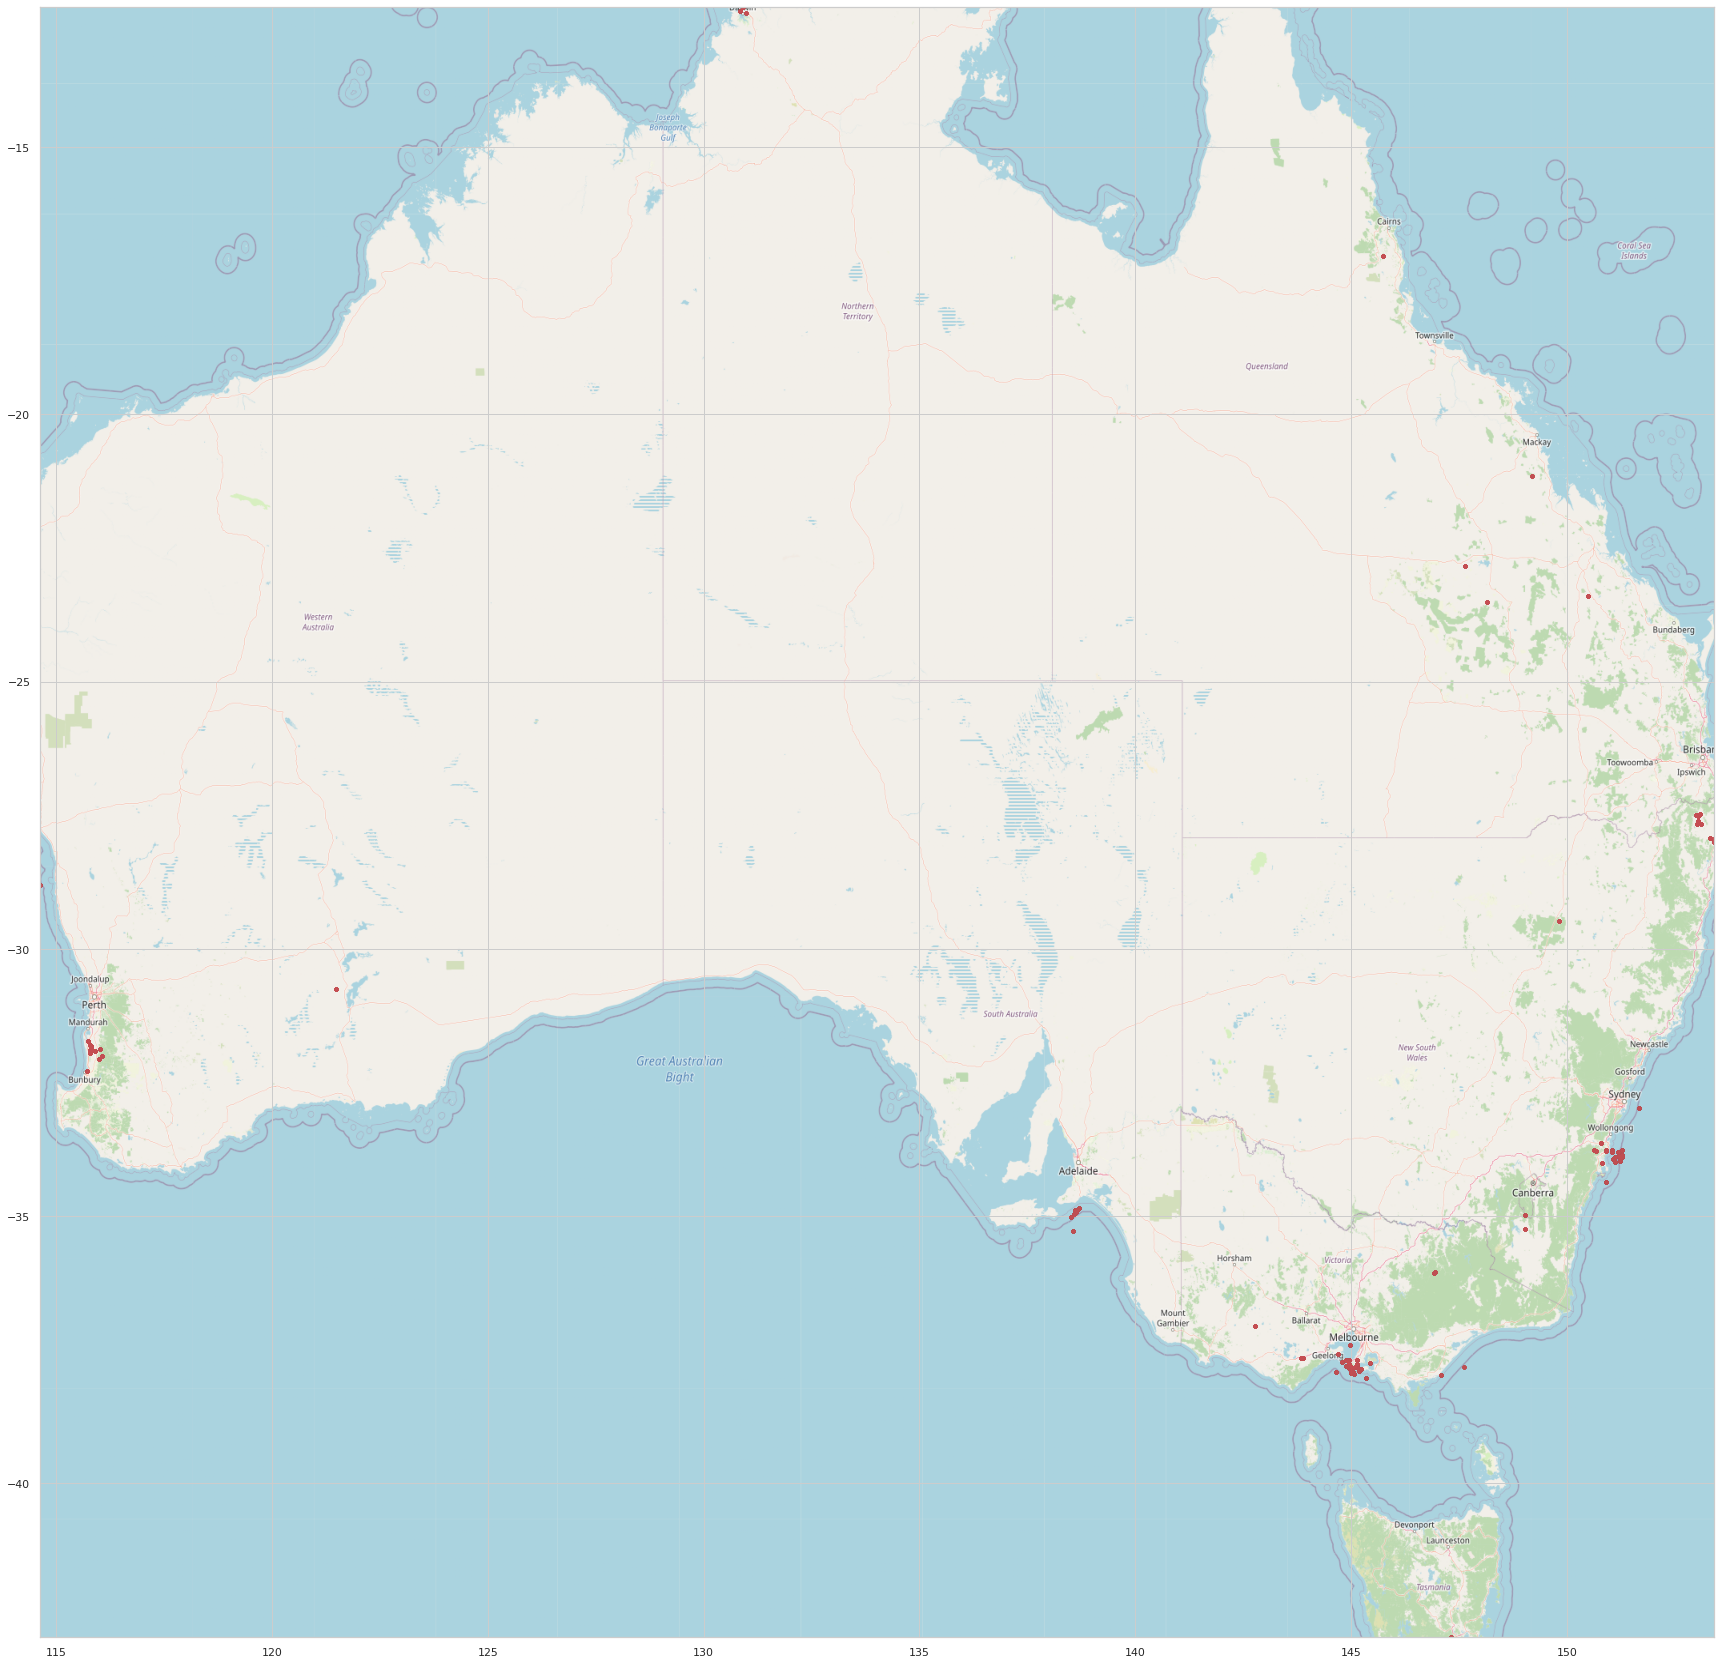

In [50]:
fig = plt.figure(figsize = (30,30))
ax = fig.add_subplot(111)
ax.scatter(df_map.longitude, df_map.latitude, zorder = 1, alpha = 0.2, c = 'r', s = 10)
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(aus_map, zorder = 0, extent = BBox, aspect = 'auto')

- We have approximately plotted the coordinates on a geographical map and can see that most of the customers are Melbourne and Sydney.
- Some of them are based in Perth, Brisbane, Darwin, Adelaide. 
- The rest of them are distributed across Australia randomly.

### txn_description

In [51]:
df.txn_description.describe()

count         12043
unique            6
top       SALES-POS
freq           3934
Name: txn_description, dtype: object

In [52]:
df.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [53]:
df.txn_description.value_counts(normalize = True)

SALES-POS     0.326663
POS           0.314124
PAYMENT       0.215893
PAY/SALARY    0.073321
INTER BANK    0.061613
PHONE BANK    0.008387
Name: txn_description, dtype: float64

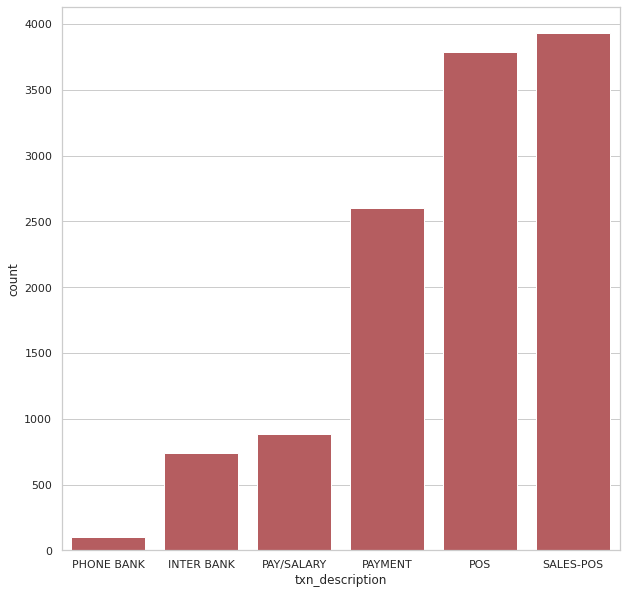

In [54]:
fig = plt.figure(figsize = (10,10))
ax = sns.countplot(df.txn_description, order = df.txn_description.value_counts(ascending = True).index, color = 'r')
plt.show()

- We can see that most of the transactions are 'SALES-POS'(32.6%) and 'POS'(31.4%).
- The least transactions are 'PHONE BANK'(0.8%).

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  12043 non-null  object        
 2   account            12043 non-null  object        
 3   long_lat           12043 non-null  object        
 4   txn_description    12043 non-null  object        
 5   merchant_id        12043 non-null  object        
 6   first_name         12043 non-null  object        
 7   balance            12043 non-null  float64       
 8   date               12043 non-null  datetime64[ns]
 9   gender             12043 non-null  object        
 10  age                12043 non-null  int64         
 11  merchant_suburb    12043 non-null  object        
 12  merchant_state     12043 non-null  object        
 13  extraction         12043 non-null  object        
 14  amount

### merchant_id

In [56]:
df.merchant_id.describe()

count             12043
unique             5726
top       Not available
freq               4326
Name: merchant_id, dtype: object

In [57]:
df.merchant_id.value_counts()

Not available                           4326
106e1272-44ab-4dcb-a438-dd98e0071e51      14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f      12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f      11
aef30de1-c67e-4ab7-8577-2931a4bf3c7e      10
                                        ... 
ea214ee8-d5c0-4f98-aefb-c568c2e0ba46       1
e5aa64b5-d1a4-4b77-b3cc-12fb61481e9c       1
d1e48030-c897-4e93-a7df-af25ff433496       1
d91b753b-1b0a-4426-b2d1-4b7c1fce0c06       1
f586891e-8bf9-4bbc-bb15-90d8c0738204       1
Name: merchant_id, Length: 5726, dtype: int64

In [58]:
df.merchant_id.value_counts(normalize = True)

Not available                           0.359213
106e1272-44ab-4dcb-a438-dd98e0071e51    0.001163
6c84c219-96ea-4c6f-9de5-0a28bcaec62f    0.000996
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f    0.000913
aef30de1-c67e-4ab7-8577-2931a4bf3c7e    0.000830
                                          ...   
ea214ee8-d5c0-4f98-aefb-c568c2e0ba46    0.000083
e5aa64b5-d1a4-4b77-b3cc-12fb61481e9c    0.000083
d1e48030-c897-4e93-a7df-af25ff433496    0.000083
d91b753b-1b0a-4426-b2d1-4b7c1fce0c06    0.000083
f586891e-8bf9-4bbc-bb15-90d8c0738204    0.000083
Name: merchant_id, Length: 5726, dtype: float64

In [59]:
df.loc[df.merchant_id != 'Not available'].merchant_id.value_counts().describe([0.25, 0.5, 0.75, 0.9])

count    5725.000000
mean        1.347948
std         0.843532
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
90%         2.000000
max        14.000000
Name: merchant_id, dtype: float64

- There are around 5725 unique merchant_id available.
- 40% of the transactions does not have merchant_id.
- The max. no. of transactions associated with a single merchant_id is 14.
- 90% of the merchant_id is associated with a max of 2 transactions.

### first name

In [60]:
df.first_name.describe()

count       12043
unique         80
top       Michael
freq          746
Name: first_name, dtype: object

In [61]:
df.first_name.value_counts()

Michael      746
Diana        578
Jessica      408
Joseph       391
Jeffrey      388
            ... 
Cindy         51
Elizabeth     44
David         40
Andrew        34
Jonathan      31
Name: first_name, Length: 80, dtype: int64

In [62]:
df.first_name.value_counts(normalize = True)

Michael      0.061945
Diana        0.047995
Jessica      0.033879
Joseph       0.032467
Jeffrey      0.032218
               ...   
Cindy        0.004235
Elizabeth    0.003654
David        0.003321
Andrew       0.002823
Jonathan     0.002574
Name: first_name, Length: 80, dtype: float64

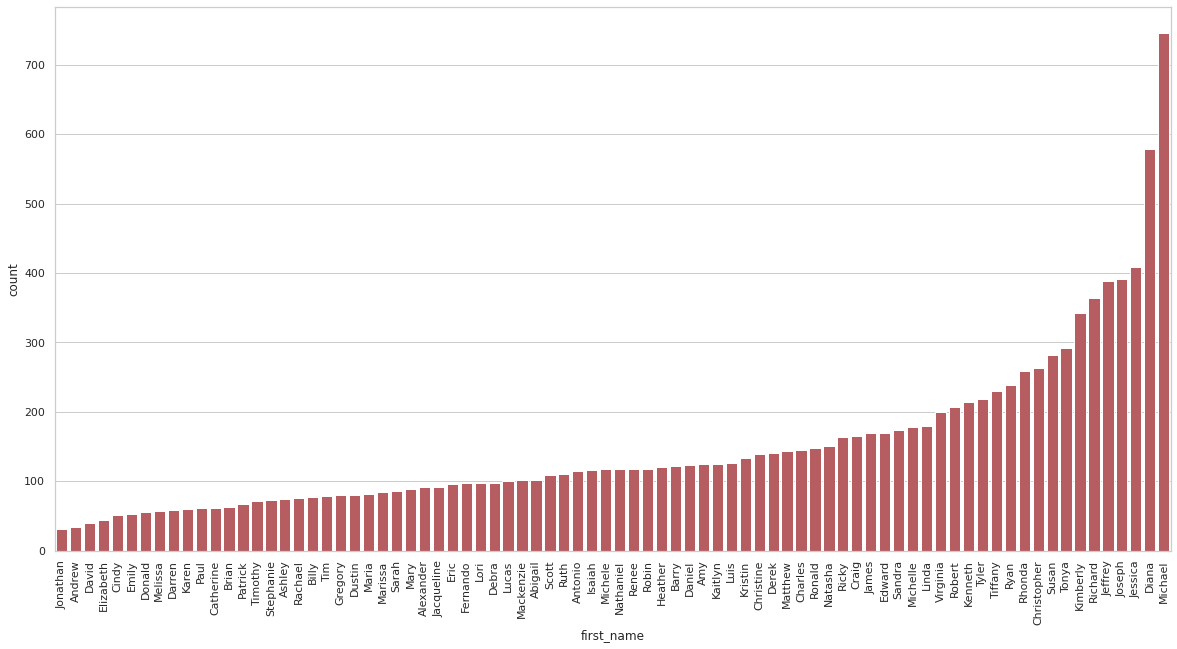

In [63]:
fig = plt.figure(figsize = (20,10))
ax = sns.countplot(df.first_name, order = df.first_name.value_counts(ascending = True).index, color = 'r')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

- 6% of the transactions are done by customers having first_name 'Michael'.
- There are 80 unique first names.

### balance

In [64]:
df.balance.describe([0.35, 0.5, 0.75, 0.9])

count     12043.000000
mean      14704.195553
std       31503.722652
min           0.240000
35%        4223.844000
50%        6432.010000
75%       12465.945000
90%       29442.384000
max      267128.520000
Name: balance, dtype: float64

<AxesSubplot:xlabel='balance'>

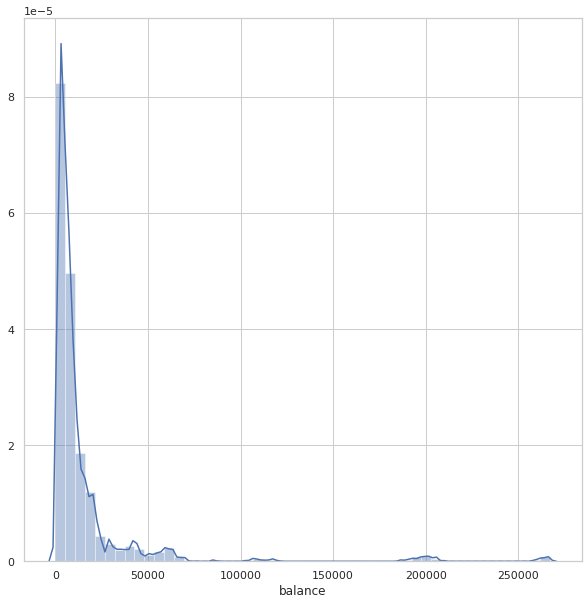

In [65]:
fig = plt.figure(figsize = (10,10))
sns.distplot(df.balance)

<AxesSubplot:ylabel='balance'>

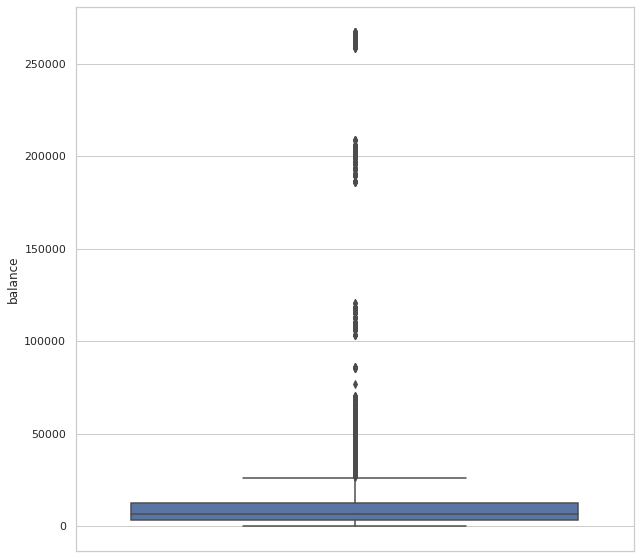

In [66]:
fig = plt.figure(figsize = (10, 10))
sns.boxplot(y = df.balance)

<AxesSubplot:ylabel='balance'>

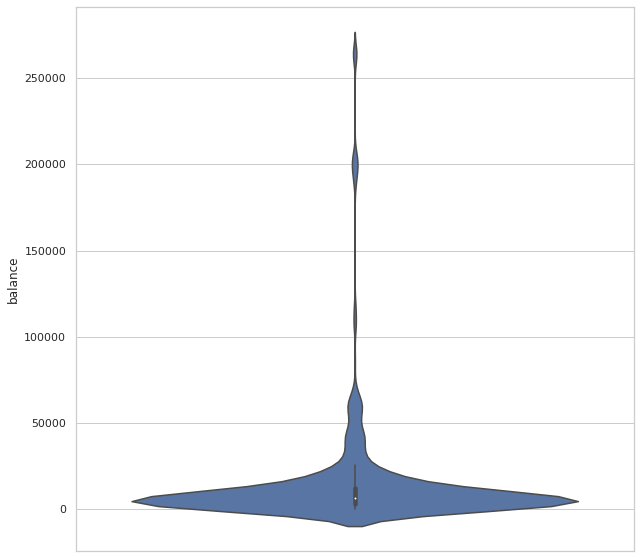

In [67]:
fig = plt.figure(figsize = (10,10))
sns.violinplot(y = df.balance, split = False)

- Most of the entries in 'balance' is between 0 and 25000.
- The average balance is found to be 14700.
- Around 90% os the entries are less than 29500.
- The max balance is found to be 267128.52

### date

In [68]:
df.date.describe(datetime_is_numeric = True)

count                            12043
mean     2018-09-15 21:27:39.951839232
min                2018-08-01 00:00:00
25%                2018-08-24 00:00:00
50%                2018-09-16 00:00:00
75%                2018-10-09 00:00:00
max                2018-10-31 00:00:00
Name: date, dtype: object

In [69]:
df.date.nunique()

91

In [70]:
df.date.value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [71]:
df.date.value_counts(normalize = True)

2018-09-28    0.014448
2018-08-17    0.014282
2018-10-05    0.013950
2018-10-17    0.013452
2018-09-14    0.013369
                ...   
2018-08-06    0.008221
2018-08-20    0.008054
2018-10-23    0.007971
2018-10-08    0.007888
2018-10-30    0.007390
Name: date, Length: 91, dtype: float64

In [72]:
df.date.value_counts().describe([0.25, 0.5, 0.75, 0.9])

count     91.000000
mean     132.340659
std       20.883390
min       89.000000
25%      115.000000
50%      136.000000
75%      149.500000
90%      158.000000
max      174.000000
Name: date, dtype: float64

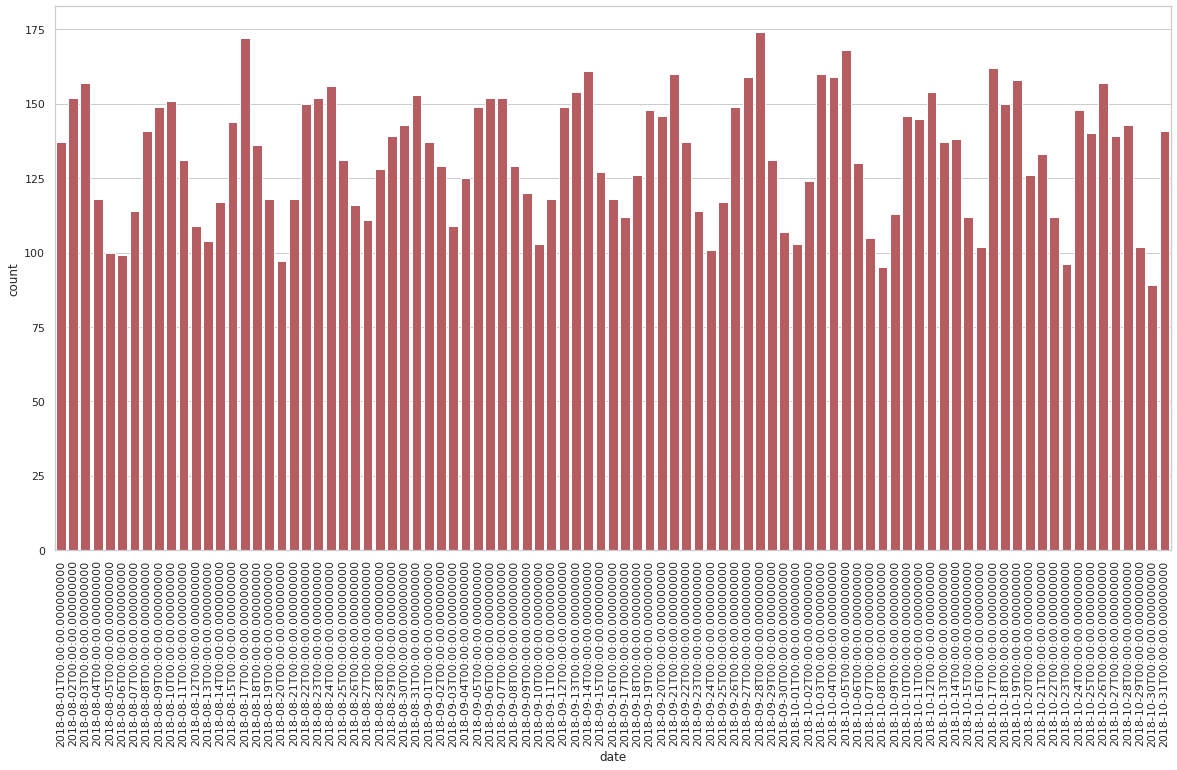

In [73]:
fig = plt.figure(figsize = (20,10))
ax = sns.countplot(df.date, color = 'r')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [74]:
df.date.dt.month_name().value_counts()

October      4087
September    4013
August       3943
Name: date, dtype: int64

In [75]:
df.date.dt.month_name().value_counts(normalize = True)

October      0.339367
September    0.333223
August       0.327410
Name: date, dtype: float64

In [76]:
df.date.dt.month_name().value_counts().median()

4013.0

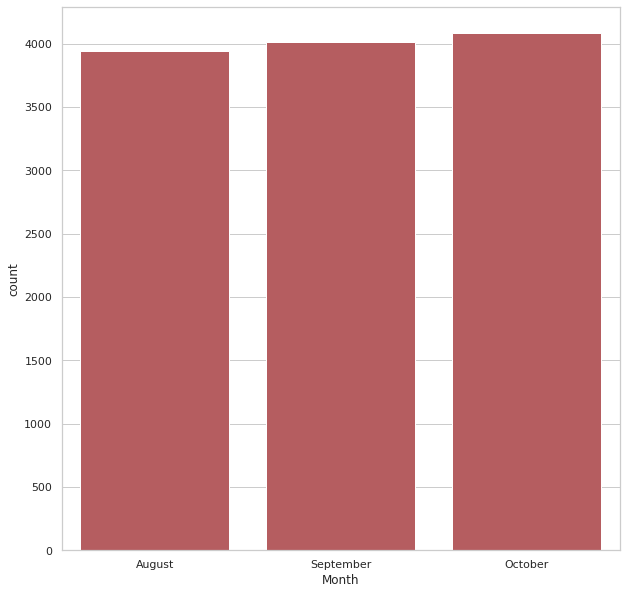

In [77]:
fig = plt.figure(figsize = (10,10))
ax = sns.countplot(df.date.dt.month_name(), order = df.date.dt.month_name().value_counts(ascending = True).index, color = 'r')
plt.xlabel('Month')
plt.show()

In [78]:
df.date.dt.day_name().value_counts()

Friday       2073
Wednesday    2063
Thursday     1801
Saturday     1709
Sunday       1550
Tuesday      1487
Monday       1360
Name: date, dtype: int64

In [79]:
df.date.dt.day_name().value_counts(normalize = True)

Friday       0.172133
Wednesday    0.171303
Thursday     0.149547
Saturday     0.141908
Sunday       0.128705
Tuesday      0.123474
Monday       0.112929
Name: date, dtype: float64

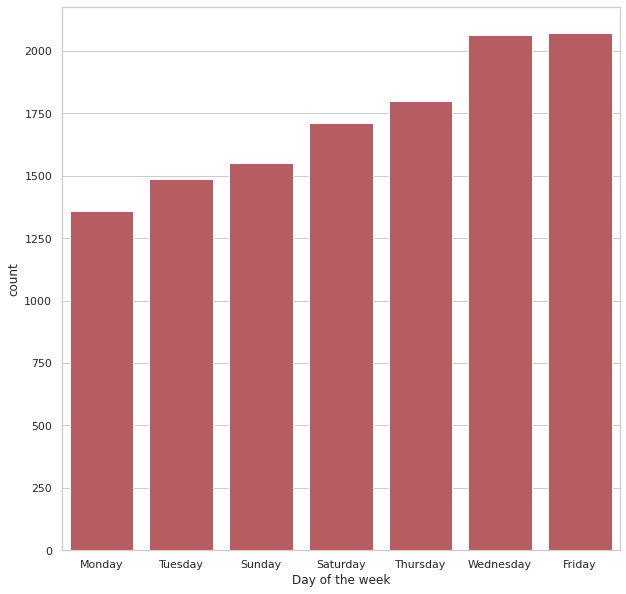

In [80]:
fig = plt.figure(figsize = (10,10))
ax = sns.countplot(df.date.dt.day_name(), order = df.date.dt.day_name().value_counts(ascending = True).index, color = 'r')
plt.xlabel('Day of the week')
plt.show()

- We can see that the total duration of the dataset is 91 days.
- It spans from 01-08-2018 to 31-10-2018.
- The maximum no. of transaction happened on 28-09-2018, 174 transactions i.e, 1.4% of the total.
- The minimum no. of transactions happened on 30-10-2018, 89 transaction i.e, 0.7% of the total.
- The average no. of transactions on each day was 132.
- 90% of the days had less than 158 transactions.
- Categorizing the transactions by the month, all the three months August, September and October have almost equal no. of transactions.
- To be accurate, the no. of transactions increased by 0.62% after August and by 0.65% after September.
- Categorizing the transactions by the day, max transactions occured Friday (17% of the total) & min transactions occured on Monday(11.2%).
- Wednesday and Friday have almost equal no. of transactions, they differ by 10 transactions.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  12043 non-null  object        
 2   account            12043 non-null  object        
 3   long_lat           12043 non-null  object        
 4   txn_description    12043 non-null  object        
 5   merchant_id        12043 non-null  object        
 6   first_name         12043 non-null  object        
 7   balance            12043 non-null  float64       
 8   date               12043 non-null  datetime64[ns]
 9   gender             12043 non-null  object        
 10  age                12043 non-null  int64         
 11  merchant_suburb    12043 non-null  object        
 12  merchant_state     12043 non-null  object        
 13  extraction         12043 non-null  object        
 14  amount

### gender

In [82]:
df.gender.describe()

count     12043
unique        2
top           M
freq       6285
Name: gender, dtype: object

In [83]:
df.gender.value_counts()

M    6285
F    5758
Name: gender, dtype: int64

In [84]:
df.gender.value_counts(normalize = True)

M    0.52188
F    0.47812
Name: gender, dtype: float64

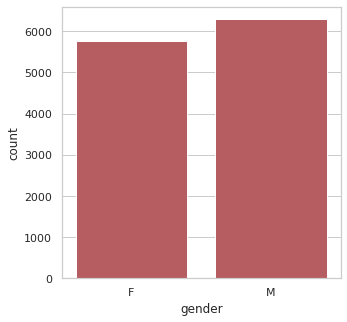

In [85]:
fig = plt.figure(figsize = (5,5))
ax = sns.countplot(df.gender, order = df.gender.value_counts(ascending = True).index, color = 'r')
plt.show()

- 52% of the transactions were done by male customers and 48% by female customers.

### age

In [86]:
df.age.describe([0.25, 0.5, 0.75, 0.9])

count    12043.000000
mean        30.582330
std         10.046343
min         18.000000
25%         22.000000
50%         28.000000
75%         38.000000
90%         43.000000
max         78.000000
Name: age, dtype: float64

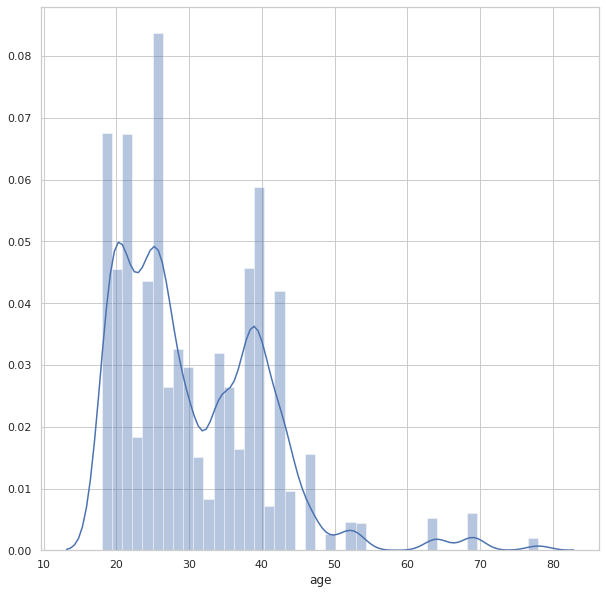

In [87]:
fig = plt.figure(figsize = (10, 10))
ax = sns.distplot(df.age)

<AxesSubplot:ylabel='age'>

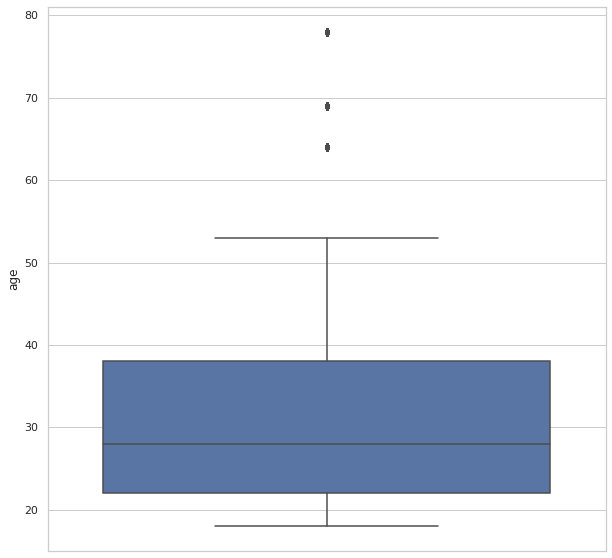

In [88]:
fig = plt.figure(figsize = (10, 10))
sns.boxplot(y = df.age)

<AxesSubplot:ylabel='age'>

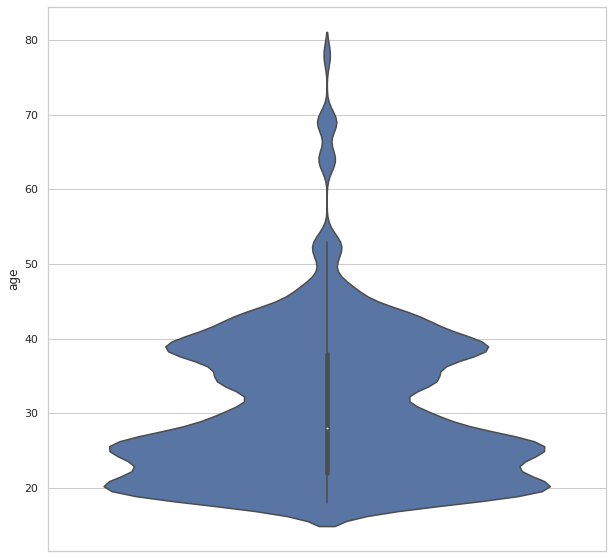

In [89]:
fig = plt.figure(figsize = (10, 10))
sns.violinplot(y = df.age)

- Most the customers are in the age group of 20-35.
- The youngest customer is 18 years old and the oldest customer is 78.
- The average age is found to be 31 years.

### merchant_suburb

In [90]:
df.merchant_suburb.describe()

count             12043
unique             1610
top       Not available
freq               4326
Name: merchant_suburb, dtype: object

In [91]:
df.merchant_suburb.value_counts().head(10)

Not available    4326
Melbourne         255
Sydney            233
Southport          82
Brisbane City      79
Chatswood          55
Perth              45
Adelaide           44
Broadbeach         41
Mount Gambier      41
Name: merchant_suburb, dtype: int64

In [92]:
df.merchant_suburb.value_counts(normalize = True).head(10)

Not available    0.359213
Melbourne        0.021174
Sydney           0.019347
Southport        0.006809
Brisbane City    0.006560
Chatswood        0.004567
Perth            0.003737
Adelaide         0.003654
Broadbeach       0.003404
Mount Gambier    0.003404
Name: merchant_suburb, dtype: float64

- There are 1609 of unique suburbs available.
- 36% of the data is missing.
- Most of the merchants are from Melbourne, 2.1%, followed by Sydney, 1.9%.

### merchant_state

In [93]:
df.merchant_state.describe()

count             12043
unique                9
top       Not available
freq               4326
Name: merchant_state, dtype: object

In [94]:
df.merchant_state.value_counts()

Not available    4326
NSW              2169
VIC              2131
QLD              1556
WA               1100
SA                415
NT                205
ACT                73
TAS                68
Name: merchant_state, dtype: int64

In [95]:
df.merchant_state.value_counts(normalize = True)

Not available    0.359213
NSW              0.180105
VIC              0.176949
QLD              0.129204
WA               0.091339
SA               0.034460
NT               0.017022
ACT              0.006062
TAS              0.005646
Name: merchant_state, dtype: float64

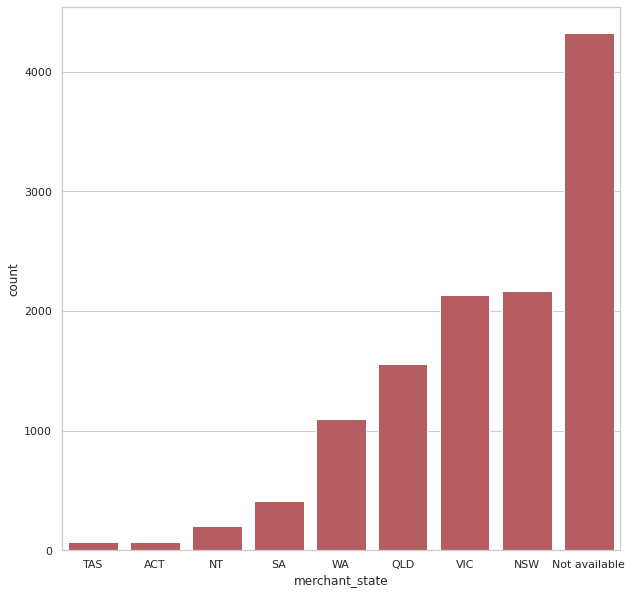

In [96]:
fig = plt.figure(figsize = (10, 10))
ax = sns.countplot(df.merchant_state, order = df.merchant_state.value_counts(ascending = True).index, color = 'r')
plt.show()

- There are 8 unique entries for merchant_state.
- 36% of the data is missing.
- Most of the merchants are from New South Wales(18%) closely followed by Victoria(17.6%).
- The least no. of merchants are from Tasmania(0.5%).

### extraction

In [97]:
df.extraction.describe()

count                            12043
unique                            9442
top       2018-09-03T11:00:00.000+0000
freq                                10
Name: extraction, dtype: object

In [98]:
df.extraction.value_counts().head(10)

2018-09-03T11:00:00.000+0000    10
2018-08-28T17:00:00.000+0000     9
2018-09-04T17:00:00.000+0000     9
2018-09-17T11:00:00.000+0000     9
2018-10-19T13:00:00.000+0000     9
2018-10-23T17:00:00.000+0000     9
2018-10-01T11:00:00.000+0000     9
2018-08-07T17:00:00.000+0000     9
2018-10-02T17:00:00.000+0000     9
2018-10-04T17:00:00.000+0000     8
Name: extraction, dtype: int64

### amount

In [99]:
df.amount.describe([0.25, 0.5, 0.75, 0.9])

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
90%        186.000000
max       8835.980000
Name: amount, dtype: float64

In [100]:
df.amount.median()

29.0

<AxesSubplot:xlabel='amount'>

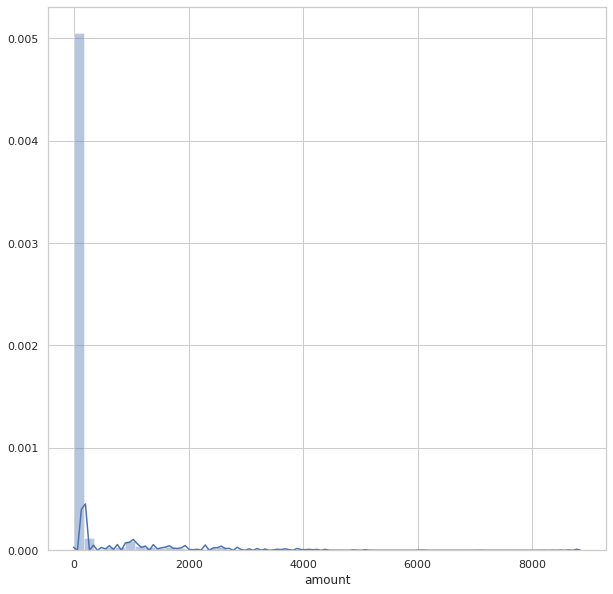

In [101]:
fig = plt.figure(figsize = (10,10))
sns.distplot(df.amount)

<AxesSubplot:ylabel='amount'>

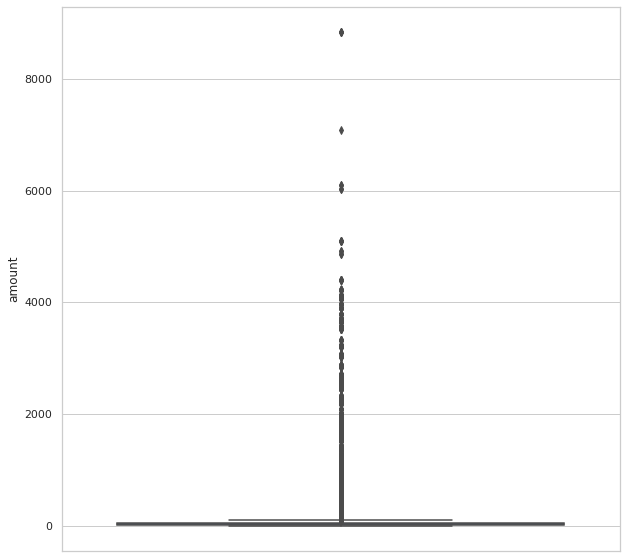

In [102]:
fig = plt.figure(figsize = (10, 10))
sns.boxplot(y = df.amount)

<AxesSubplot:ylabel='amount'>

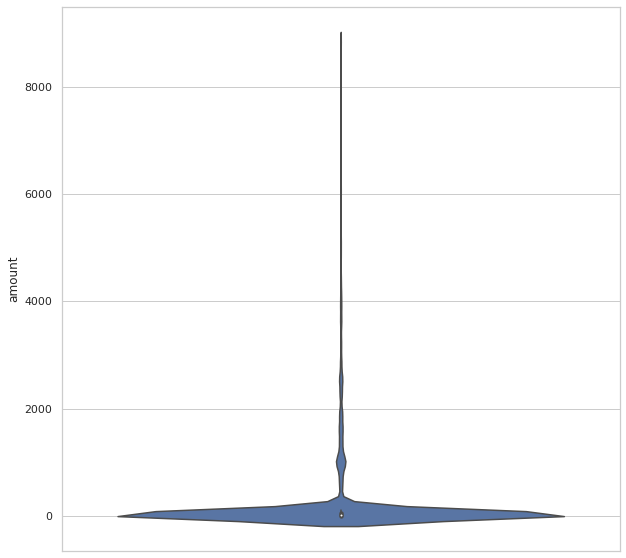

In [103]:
fig = plt.figure(figsize = (10, 10))
sns.violinplot(y = df.amount)

- Most of the transaction amount is between 0-100 AUD.
- The min transaction amount is 0.1 AUD and the maximum is 8836 AUD.
- 90% of the transactions is below 190 AUD.
- The avg. transactions amount is 29 AUD.

### transaction_id

In [104]:
df.transaction_id.describe()

count                                12043
unique                               12043
top       4e2f183153cd41f390efc1c576ea6e85
freq                                     1
Name: transaction_id, dtype: object

- There is an unique transaction ID for each transaction.

### country

In [105]:
df.country.describe()

count         12043
unique            1
top       Australia
freq          12043
Name: country, dtype: object

- All the transactions are made from Australia. So we may as well drop the column. 

In [106]:
df.drop(columns = 'country', axis = 1, inplace = True)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  12043 non-null  object        
 2   account            12043 non-null  object        
 3   long_lat           12043 non-null  object        
 4   txn_description    12043 non-null  object        
 5   merchant_id        12043 non-null  object        
 6   first_name         12043 non-null  object        
 7   balance            12043 non-null  float64       
 8   date               12043 non-null  datetime64[ns]
 9   gender             12043 non-null  object        
 10  age                12043 non-null  int64         
 11  merchant_suburb    12043 non-null  object        
 12  merchant_state     12043 non-null  object        
 13  extraction         12043 non-null  object        
 14  amount

### customer_id

In [108]:
df.customer_id.describe()

count              12043
unique               100
top       CUS-2487424745
freq                 578
Name: customer_id, dtype: object

In [109]:
df.customer_id.value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

In [110]:
df.customer_id.value_counts(normalize = True)

CUS-2487424745    0.047995
CUS-2142601169    0.025160
CUS-3026014945    0.024246
CUS-3378712515    0.021589
CUS-1614226872    0.021506
                    ...   
CUS-3395687666    0.003321
CUS-3201519139    0.003072
CUS-1646183815    0.002823
CUS-495599312     0.002574
CUS-1739931018    0.002076
Name: customer_id, Length: 100, dtype: float64

In [111]:
df.customer_id.value_counts().describe([0.25, 0.5, 0.75, 0.9])

count    100.000000
mean     120.430000
std       74.463231
min       25.000000
25%       77.750000
50%      109.500000
75%      141.750000
90%      202.100000
max      578.000000
Name: customer_id, dtype: float64

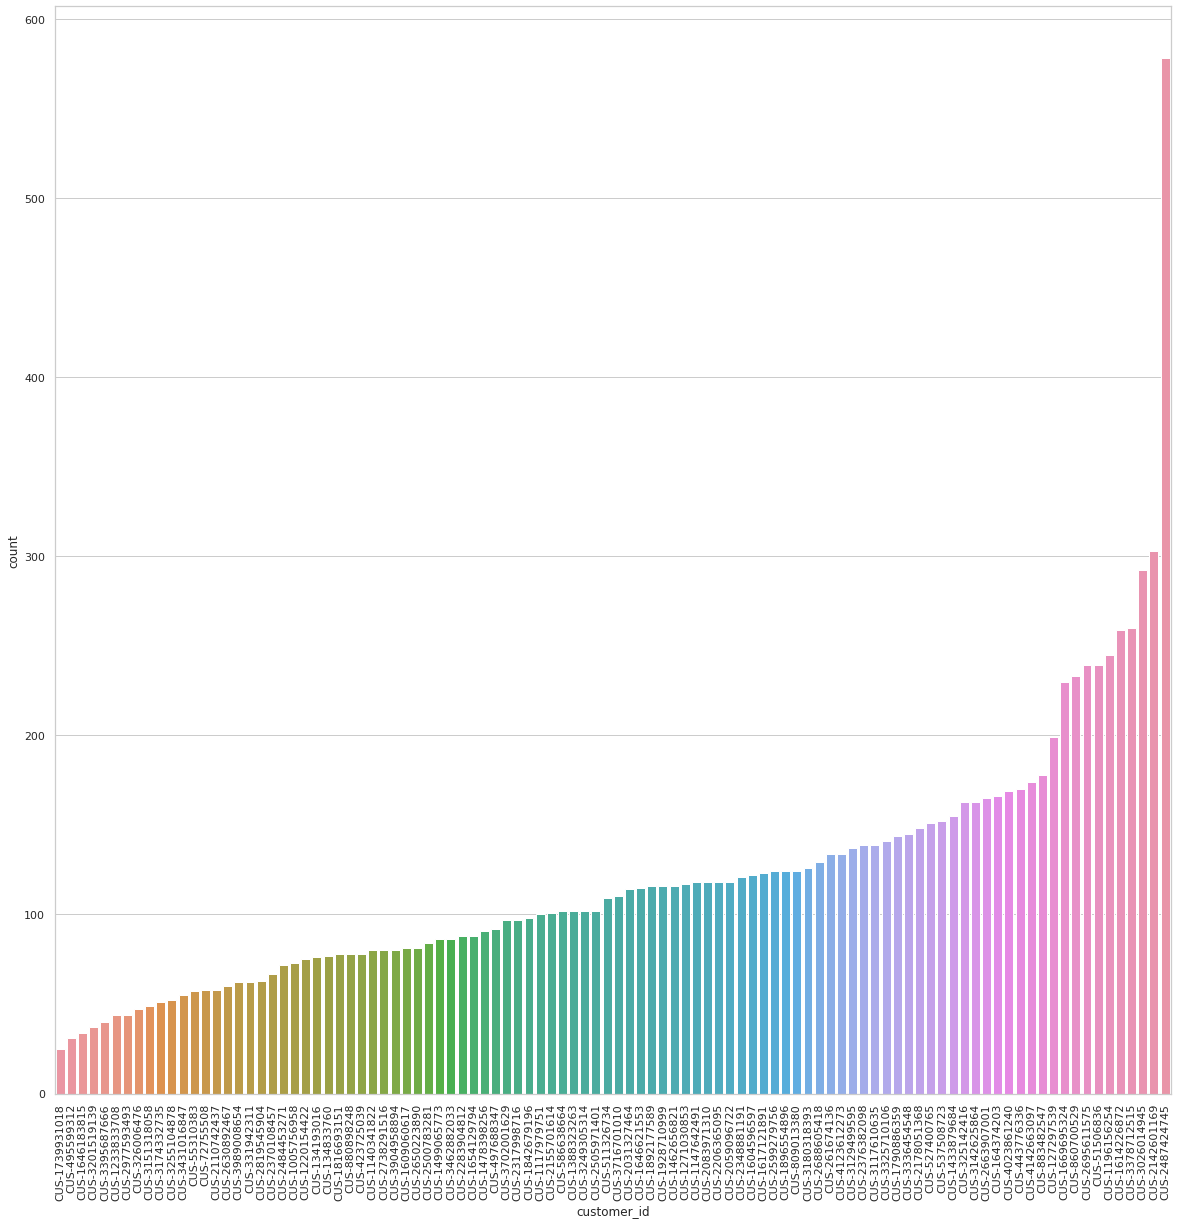

In [112]:
fig = plt.figure(figsize = (20, 20))
ax = sns.countplot(df.customer_id, order = df.customer_id.value_counts(ascending = True).index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

- There are 100 unique customer_id.
- The max. no. of transactions done from a single id is 578(4.7%).
- The min. no. of transactions from a single id is 25(0.2%).
- The avg. no. of transactions from a single customer is 120.
- 90% of customers have done less than 200 transactions.

### merchant_long_lat

In [113]:
df.merchant_long_lat.describe()

count             12043
unique             2704
top       Not available
freq               4326
Name: merchant_long_lat, dtype: object

In [114]:
df.merchant_long_lat.value_counts()

Not available    4326
151.21 -33.87     145
144.96 -37.82      85
144.97 -37.81      59
144.96 -37.81      56
                 ... 
115.82 -31.91       1
144.61 -37.88       1
144.35 -38.1        1
153.2 -28.16        1
148.24 -20          1
Name: merchant_long_lat, Length: 2704, dtype: int64

In [115]:
df.merchant_long_lat.value_counts(normalize = True)

Not available    0.359213
151.21 -33.87    0.012040
144.96 -37.82    0.007058
144.97 -37.81    0.004899
144.96 -37.81    0.004650
                   ...   
115.82 -31.91    0.000083
144.61 -37.88    0.000083
144.35 -38.1     0.000083
153.2 -28.16     0.000083
148.24 -20       0.000083
Name: merchant_long_lat, Length: 2704, dtype: float64

In [116]:
df.groupby('merchant_long_lat').merchant_id.nunique()

merchant_long_lat
113.83 -22.76    1
114.16 -27.71    1
114.17 -27.7     1
114.17 -27.71    2
114.57 -26.7     1
                ..
153.59 -28.79    2
153.6 -28.63     1
153.6 -28.65     1
153.61 -28.64    2
Not available    1
Name: merchant_id, Length: 2704, dtype: int64

<AxesSubplot:xlabel='merchant_id', ylabel='count'>

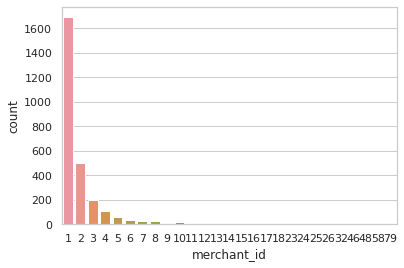

In [117]:
sns.countplot(df.groupby('merchant_long_lat').merchant_id.nunique())

- Unlike location of customers, there are mutliple merchants in a single location.
- We can plot the locatins of the merhcants on the map.

In [118]:
df['merchant_longitude'] = df.merchant_long_lat.str.split(expand = True).iloc[:,0]

In [119]:
df['merchant_latitute'] = df.merchant_long_lat.str.split(expand = True).iloc[:,1]

In [120]:
df_map = df.loc[df.merchant_long_lat != 'Not available']

In [121]:
df_map.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,longitude,latitude,merchant_longitude,merchant_latitute
0,authorized,1,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95,153.38,-27.99
1,authorized,0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95,151.21,-33.87
2,authorized,1,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94,151.21,-33.87
3,authorized,1,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66,153.05,-26.68
4,authorized,1,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95,153.44,-28.06


In [122]:
df_map = df_map.astype({'merchant_longitude':float, 'merchant_latitute':float})

In [123]:
BBox = (df_map.merchant_longitude.min(), df_map.merchant_longitude.max(), df_map.merchant_latitute.min(), df_map.merchant_latitute.max())

In [124]:
BBox

(113.83, 153.61, -43.31, -12.33)

In [125]:
aus_map = plt.imread('map_2.png')

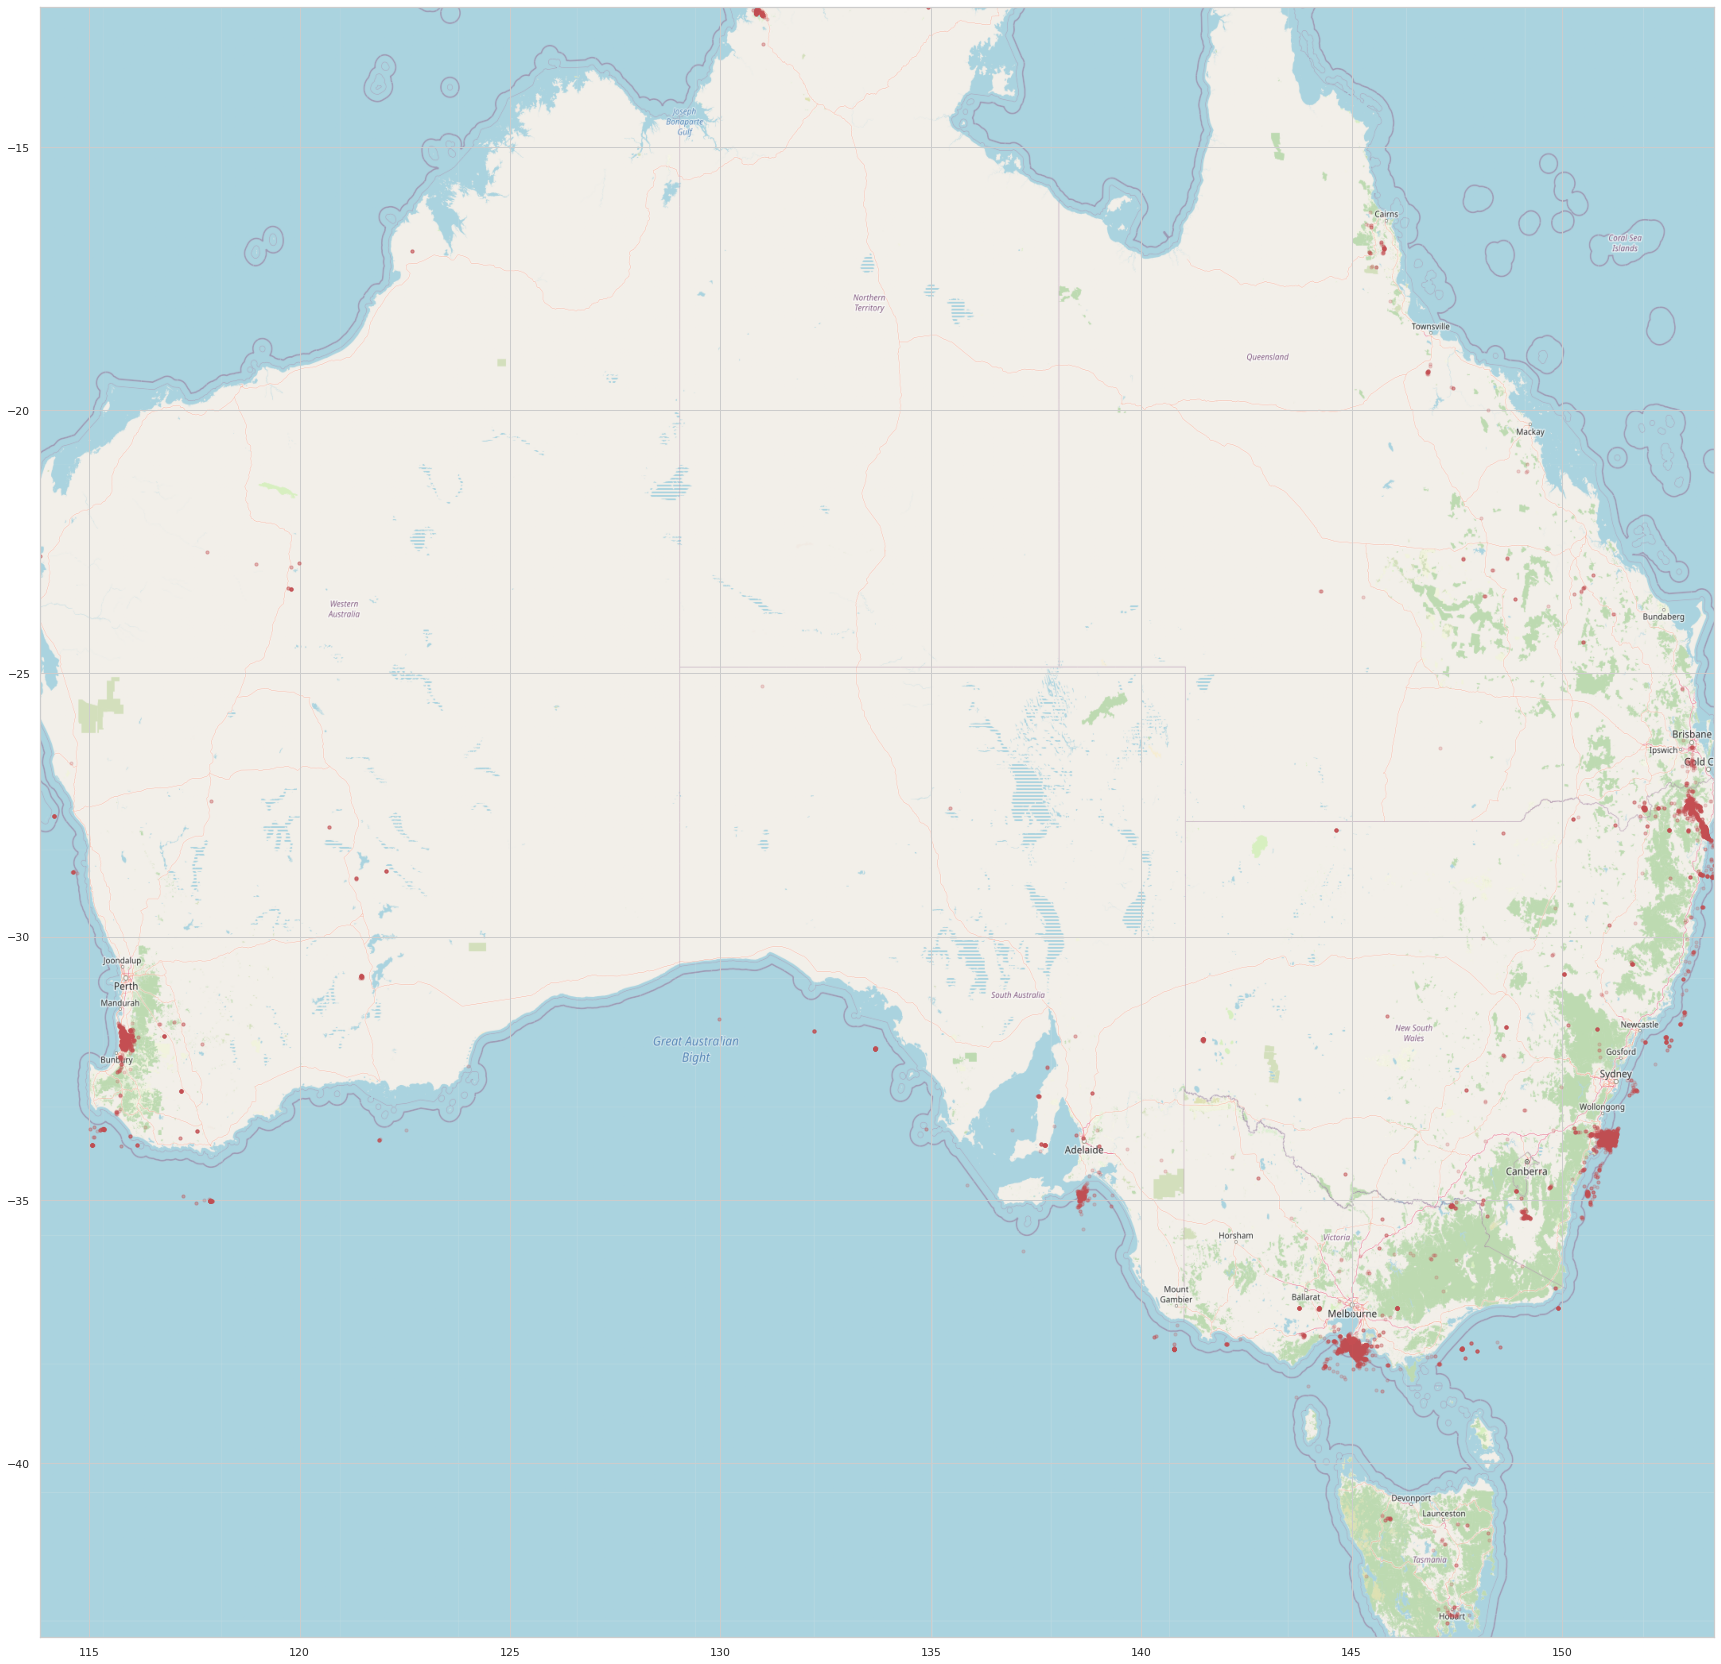

In [126]:
fig = plt.figure(figsize = (30,30))
ax = fig.add_subplot(111)
ax.scatter(df_map.merchant_longitude, df_map.merchant_latitute, zorder = 1, alpha = 0.2, c = 'r', s = 10)
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(aus_map, zorder = 0, extent = BBox, aspect = 'auto')

- As we can see most of the merchants are based in and around Melbourne, Sydney, Brisbane, Perth, Adelaide.

### movement 

In [127]:
df.movement.describe()

count     12043
unique        2
top       debit
freq      11160
Name: movement, dtype: object

In [128]:
df.movement.value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

In [129]:
df.movement.value_counts(normalize = True)

debit     0.926679
credit    0.073321
Name: movement, dtype: float64

<AxesSubplot:xlabel='movement', ylabel='count'>

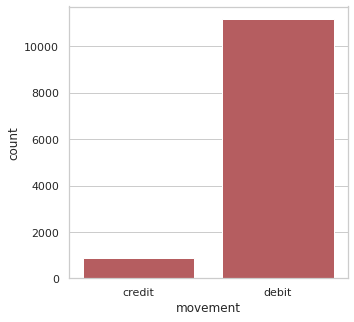

In [130]:
fig = plt.figure(figsize = (5,5))
sns.countplot(df.movement, order = df.movement.value_counts(ascending = True).index, color = 'r')

- Most of the transactions are debit, 93%. The credit is 7% of the transactions.

In [131]:
df['month'] = df.date.dt.month_name()

In [132]:
df['day'] = df.date.dt.day_name()

In [133]:
df.groupby('month').amount.sum().sort_values(ascending = True)

month
August       729935.52
September    730550.21
October      802798.47
Name: amount, dtype: float64

In [134]:
df.groupby('month').amount.mean().sort_values(ascending = True)

month
September    182.045903
August       185.121867
October      196.427323
Name: amount, dtype: float64

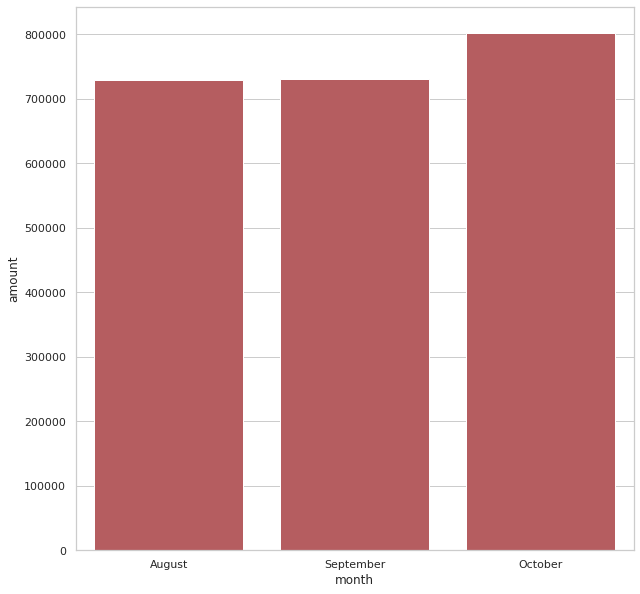

In [135]:
fig = plt.figure(figsize = (10,10))
ax = sns.barplot(x = df.groupby('month').amount.sum().sort_values(ascending = True).index, y =df.groupby('month').amount.sum().sort_values(ascending = True), color = 'r')

In [136]:
df.groupby('day').amount.sum().sort_values(ascending = True)

day
Sunday        82174.56
Saturday      93002.56
Tuesday      329484.19
Thursday     331402.77
Wednesday    402729.72
Monday       507580.56
Friday       516909.84
Name: amount, dtype: float64

In [137]:
df.groupby('day').amount.mean().sort_values(ascending = True)

day
Sunday        53.015845
Saturday      54.419286
Thursday     184.010422
Wednesday    195.215570
Tuesday      221.576456
Friday       249.353517
Monday       373.221000
Name: amount, dtype: float64

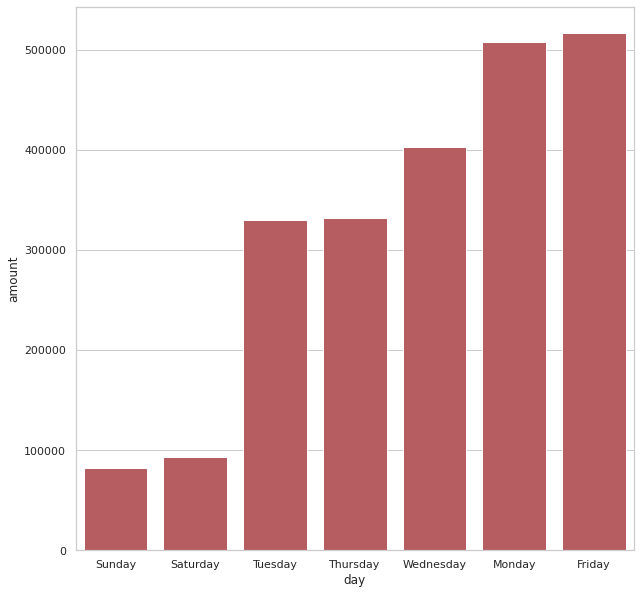

In [138]:
fig = plt.figure(figsize = (10,10))
ax = sns.barplot(x = df.groupby('day').amount.sum().sort_values(ascending = True).index, y =df.groupby('day').amount.sum().sort_values(ascending = True), color = 'r')

- Dividing the transaction on the month they happened, October has the highest transaction amount, and August the least.
- The average transaction amount in each month is highest in October and lowest in September.
- Dividing the transactions on the day they happened, Friday has the highest transaction amount, and Sunday the least.
- Even though the Monday had the least no, of transactions, the total transaction amount on Mondays is close to Friday.
- The average transaction amount is the highest on Monday and least on Sunday.

## Predicting annual salary

### Using the above dataset, we are asked to train a model to predict the annual salary of each customer.
- The annual salary of each customer need to be extracted from the given data.
- This can be done by taking out the salary transactions of each customer for the given three months period and scale it for 12 months.

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   status              12043 non-null  object        
 1   card_present_flag   12043 non-null  object        
 2   account             12043 non-null  object        
 3   long_lat            12043 non-null  object        
 4   txn_description     12043 non-null  object        
 5   merchant_id         12043 non-null  object        
 6   first_name          12043 non-null  object        
 7   balance             12043 non-null  float64       
 8   date                12043 non-null  datetime64[ns]
 9   gender              12043 non-null  object        
 10  age                 12043 non-null  int64         
 11  merchant_suburb     12043 non-null  object        
 12  merchant_state      12043 non-null  object        
 13  extraction          12043 non-null  object    

In [397]:
df_salary = df.loc[df.txn_description == 'PAY/SALARY']

In [398]:
df_salary

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,transaction_id,customer_id,merchant_long_lat,movement,longitude,latitude,merchant_longitude,merchant_latitute,month,day
50,posted,Not available,ACC-588564840,151.27 -33.76,PAY/SALARY,Not available,Isaiah,8342.11,2018-08-01,M,...,9ca281650e5d482d9e53f85e959baa66,CUS-1462656821,Not available,credit,151.27,-33.76,Not,available,August,Wednesday
61,posted,Not available,ACC-1650504218,145.01 -37.93,PAY/SALARY,Not available,Marissa,2040.58,2018-08-01,F,...,1822eb0e1bbe4c9e95ebbb0fa2cc4323,CUS-2500783281,Not available,credit,145.01,-37.93,Not,available,August,Wednesday
64,posted,Not available,ACC-3326339947,151.18 -33.80,PAY/SALARY,Not available,Eric,3158.51,2018-08-01,M,...,bd62b1799a454cedbbb56364f7c40cbf,CUS-326006476,Not available,credit,151.18,-33.80,Not,available,August,Wednesday
68,posted,Not available,ACC-3541460373,145.00 -37.83,PAY/SALARY,Not available,Jeffrey,2517.66,2018-08-01,M,...,0d95c7c932bb48e5b44c2637bdd3efe9,CUS-1433879684,Not available,credit,145.00,-37.83,Not,available,August,Wednesday
70,posted,Not available,ACC-2776252858,144.95 -37.76,PAY/SALARY,Not available,Kristin,2271.79,2018-08-01,F,...,f50ccf1195214d14a0acbfcb5a265193,CUS-4123612273,Not available,credit,144.95,-37.76,Not,available,August,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,posted,Not available,ACC-1973887809,115.78 -31.90,PAY/SALARY,Not available,Antonio,9378.51,2018-10-31,M,...,0e6cffb4401043c891ab7a50ec594208,CUS-1646621553,Not available,credit,115.78,-31.90,Not,available,October,Wednesday
12000,posted,Not available,ACC-819621312,145.04 -37.85,PAY/SALARY,Not available,Michele,3440.01,2018-10-31,F,...,ad13e06fffba4771b3c994f9147e68c0,CUS-1271030853,Not available,credit,145.04,-37.85,Not,available,October,Wednesday
12001,posted,Not available,ACC-2920611728,144.96 -37.76,PAY/SALARY,Not available,Tyler,11381.44,2018-10-31,M,...,14a1604e6ead4b54b65d7a28ec546a69,CUS-1388323263,Not available,credit,144.96,-37.76,Not,available,October,Wednesday
12003,posted,Not available,ACC-1799207998,150.68 -33.79,PAY/SALARY,Not available,Susan,11454.52,2018-10-31,F,...,cd1b1dea1d2f43e882d3499b3717d23b,CUS-164374203,Not available,credit,150.68,-33.79,Not,available,October,Wednesday


In [399]:
annual_salary = ((df_salary.groupby('customer_id').amount.sum()) / (df_salary.groupby('customer_id').month.nunique())) * 12

In [400]:
df_train = pd.DataFrame({'customer_id' : df_salary.customer_id.unique()})

In [401]:
df_train.shape

(100, 1)

In [402]:
df_train.set_index('customer_id', inplace = True)

In [403]:
for i in df_train.index:
    df_train.loc[i, 'annual_salary'] = annual_salary.loc[annual_salary.index == i][0]

In [404]:
df_train

,annual_salary
customer_id,
CUS-1462656821,109310.60
CUS-2500783281,91082.88
CUS-326006476,55068.16
CUS-1433879684,39426.24
CUS-4123612273,59810.24
...,...
CUS-1816693151,141375.68
CUS-497688347,58930.80
CUS-423725039,44550.72


- We can also get more information regarding the customers like age and gender.

In [405]:
for i in df_train.index:
    df_train.loc[i, 'gender'] = df_salary.loc[df_salary.customer_id == i].gender.unique()[0]

In [406]:
df_train

,annual_salary,gender
customer_id,,
CUS-1462656821,109310.60,M
CUS-2500783281,91082.88,F
CUS-326006476,55068.16,M
CUS-1433879684,39426.24,M
CUS-4123612273,59810.24,F
...,...,...
CUS-1816693151,141375.68,M
CUS-497688347,58930.80,F
CUS-423725039,44550.72,F


In [407]:
for i in df_train.index:
    df_train.loc[i, 'age'] = df_salary.loc[df_salary.customer_id == i].age.unique()[0]

In [408]:
df_train

,annual_salary,gender,age
customer_id,,,
CUS-1462656821,109310.60,M,23.0
CUS-2500783281,91082.88,F,23.0
CUS-326006476,55068.16,M,22.0
CUS-1433879684,39426.24,M,24.0
CUS-4123612273,59810.24,F,43.0
...,...,...,...
CUS-1816693151,141375.68,M,40.0
CUS-497688347,58930.80,F,30.0
CUS-423725039,44550.72,F,24.0


- We can also get the customers annual expenses and see if this contributes to the income.
- This can be done by extracting all the debit transactions done by each customer for 3 months and then scaling it to 12 months.

In [409]:
df.loc[df.movement == 'credit'].txn_description.unique()

array(['PAY/SALARY'], dtype=object)

In [410]:
df_payments = df.loc[df.movement == 'debit']

In [411]:
df_payments

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,transaction_id,customer_id,merchant_long_lat,movement,longitude,latitude,merchant_longitude,merchant_latitute,month,day
0,authorized,1,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95,153.38,-27.99,August,Wednesday
1,authorized,0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95,151.21,-33.87,August,Wednesday
2,authorized,1,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94,151.21,-33.87,August,Wednesday
3,authorized,1,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66,153.05,-26.68,August,Wednesday
4,authorized,1,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95,153.44,-28.06,August,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0,ACC-3021093232,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,Melissa,14054.14,2018-10-31,F,...,f2e3e695c2ee4c50a4c8747f852cbe2e,CUS-55310383,145.23 -37.81,debit,149.83,-29.47,145.23,-37.81,October,Wednesday
12039,authorized,1,ACC-1608363396,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,Robert,9137.79,2018-10-31,M,...,56e147e5485f4683b9076fcaaed76640,CUS-2688605418,150.88 -33.96,debit,151.22,-33.87,150.88,-33.96,October,Wednesday
12040,authorized,1,ACC-3827517394,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,Craig,45394.57,2018-10-31,M,...,2fdd4681827343f6af2e6519644a684a,CUS-2663907001,150.92 -33.74,debit,151.12,-33.89,150.92,-33.74,October,Wednesday
12041,authorized,1,ACC-2920611728,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,Tyler,11350.67,2018-10-31,M,...,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,CUS-1388323263,145.09 -37.91,debit,144.96,-37.76,145.09,-37.91,October,Wednesday


In [412]:
df_payments.groupby('customer_id').amount.sum()

customer_id
CUS-1005756958    3652.86
CUS-1117979751    8933.82
CUS-1140341822    5511.54
CUS-1147642491    6732.75
CUS-1196156254    8724.61
                   ...   
CUS-72755508      2734.53
CUS-809013380     5328.18
CUS-860700529     7248.16
CUS-880898248     2858.57
CUS-883482547     8797.19
Name: amount, Length: 100, dtype: float64

In [413]:
df_payments.groupby('customer_id').month.nunique()

customer_id
CUS-1005756958    3
CUS-1117979751    3
CUS-1140341822    3
CUS-1147642491    3
CUS-1196156254    3
                 ..
CUS-72755508      3
CUS-809013380     3
CUS-860700529     3
CUS-880898248     3
CUS-883482547     3
Name: month, Length: 100, dtype: int64

In [414]:
annual_expense = ((df_payments.groupby('customer_id').amount.sum()) / (df_payments.groupby('customer_id').month.nunique())) * 12

In [415]:
annual_expense

customer_id
CUS-1005756958    14611.44
CUS-1117979751    35735.28
CUS-1140341822    22046.16
CUS-1147642491    26931.00
CUS-1196156254    34898.44
                    ...   
CUS-72755508      10938.12
CUS-809013380     21312.72
CUS-860700529     28992.64
CUS-880898248     11434.28
CUS-883482547     35188.76
Length: 100, dtype: float64

In [416]:
for i in df_train.index:
    df_train.loc[i, 'annual_expense'] = annual_expense.loc[annual_expense.index == i][0]

In [417]:
df_train

,annual_salary,gender,age,annual_expense
customer_id,,,,
CUS-1462656821,109310.60,M,23.0,28734.20
CUS-2500783281,91082.88,F,23.0,14550.00
CUS-326006476,55068.16,M,22.0,7683.72
CUS-1433879684,39426.24,M,24.0,22827.20
CUS-4123612273,59810.24,F,43.0,29438.24
...,...,...,...,...
CUS-1816693151,141375.68,M,40.0,19486.48
CUS-497688347,58930.80,F,30.0,22315.32
CUS-423725039,44550.72,F,24.0,10905.76


## EDA of acquired data 

### annual_salary

In [463]:
report = svs.analyze(df_train, 'annual_salary')

:FEATURES DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [464]:
report.show_html('report.html')

In [465]:
df_train.annual_salary.describe([0.25, 0.5, 0.75, 0.9])

count       100.000000
mean      67939.323600
std       26566.072103
min       28623.840000
25%       47494.290000
50%       59905.120000
75%       85330.060000
90%      109305.056000
max      141375.680000
Name: annual_salary, dtype: float64

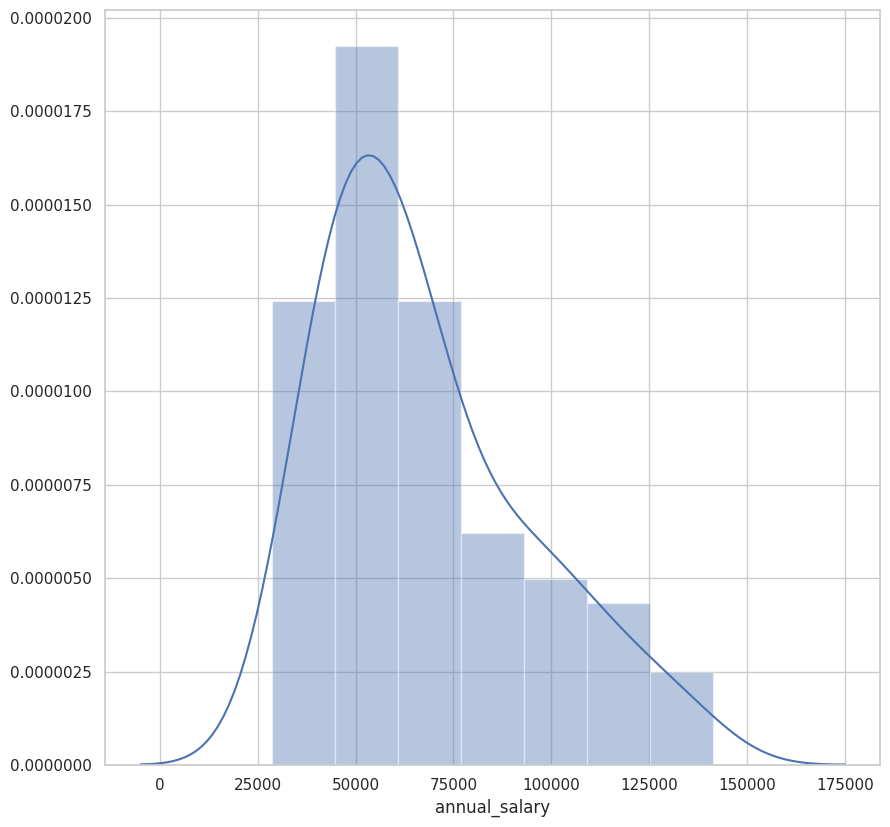

In [475]:
sns.set(style = 'whitegrid')
fig = plt.figure(figsize = (10, 10))
ax = sns.distplot(df_train.annual_salary)

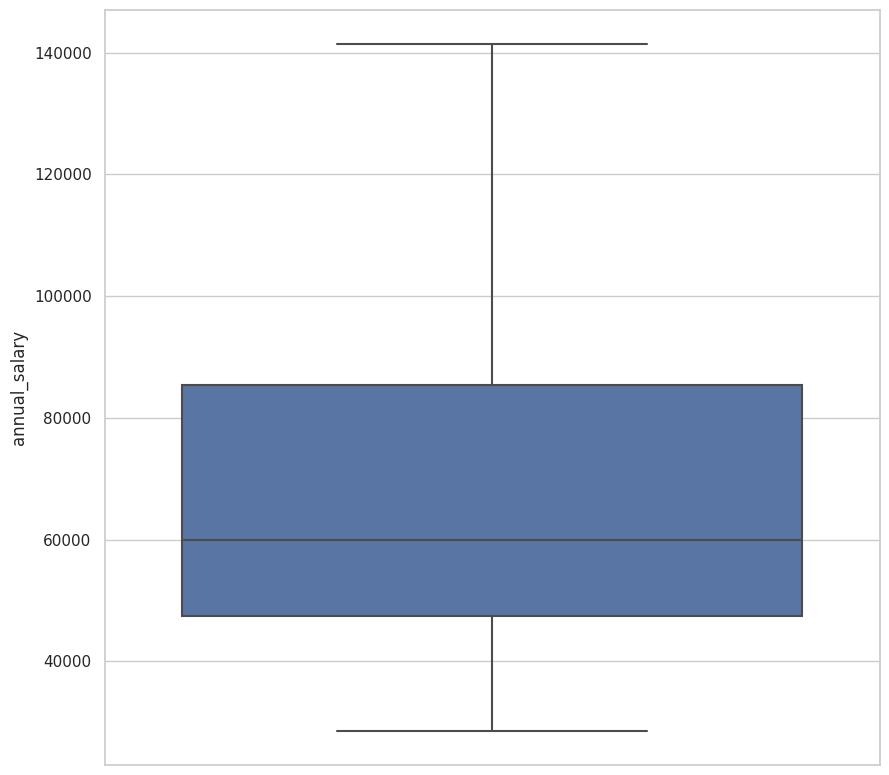

In [476]:
fig = plt.figure(figsize = (10, 10))
ax = sns.boxplot(y = df_train.annual_salary)

- We can see that the salary is mostly distributed between 50000 and 70000.
- The mean salary is 68000.
- 90% of customers are having an annual salary less than 109000.

In [468]:
df_train.gender.value_counts(normalize = True)

M    0.56
F    0.44
Name: gender, dtype: float64

- We can see that 56% of the customers are male and 44% are female.

In [469]:
df_train.age.describe([0.25, 0.5, 0.75, 0.9])

count    100.000000
mean      31.770000
std       11.544254
min       18.000000
25%       22.000000
50%       29.500000
75%       39.250000
90%       44.000000
max       78.000000
Name: age, dtype: float64

In [470]:
df_train.age.median()

29.5

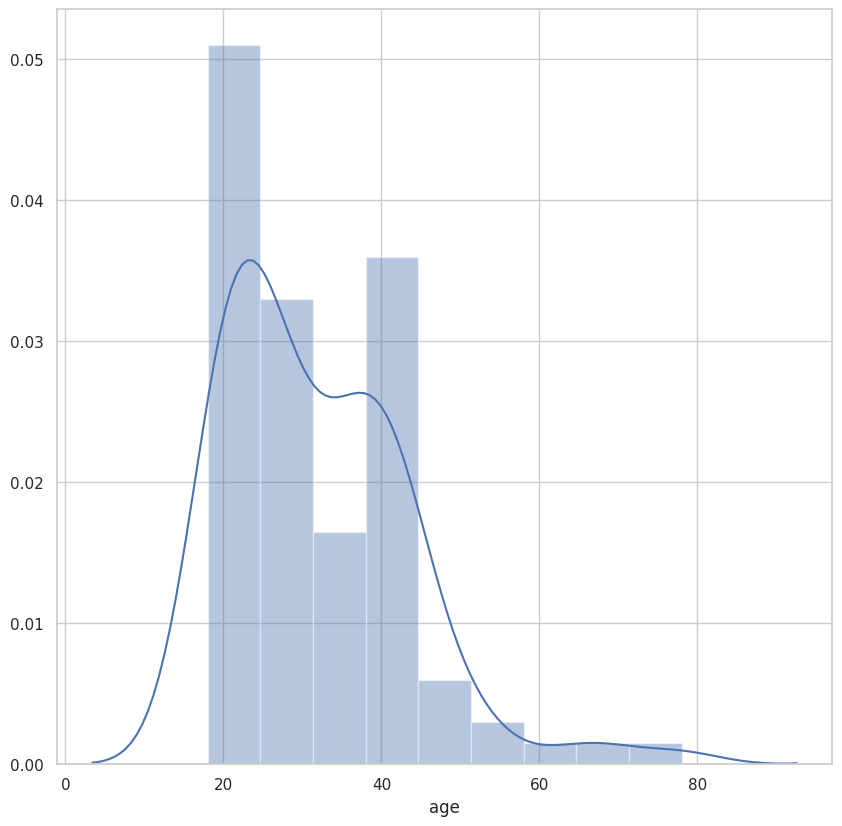

In [477]:
fig = plt.figure(figsize = (10, 10))
ax = sns.distplot(df_train.age)

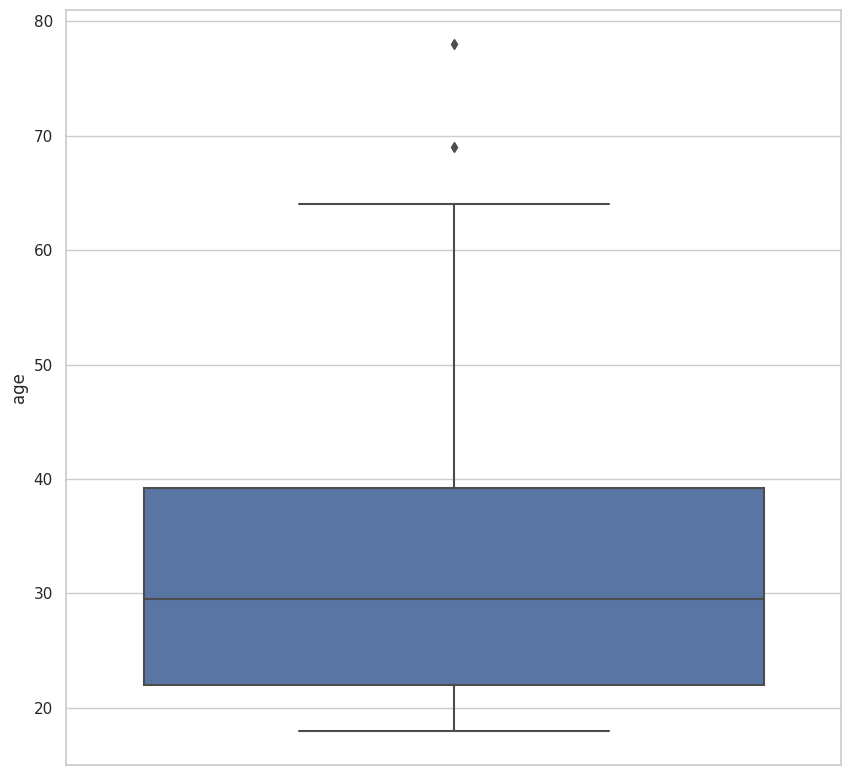

In [478]:
fig = plt.figure(figsize = (10, 10))
ax = sns.boxplot(y = df_train.age)

- Maximum customers are in the age group of 20-25.
- The average age of customers is 30.
- 90% of the customers are below 40.

In [473]:
df_train.annual_expense.describe([0.25, 0.5, 0.75, 0.9])

count      100.000000
mean     23486.803600
std      10422.090448
min       5552.880000
25%      15208.160000
50%      22899.020000
75%      28410.670000
90%      36548.700000
max      51462.720000
Name: annual_expense, dtype: float64

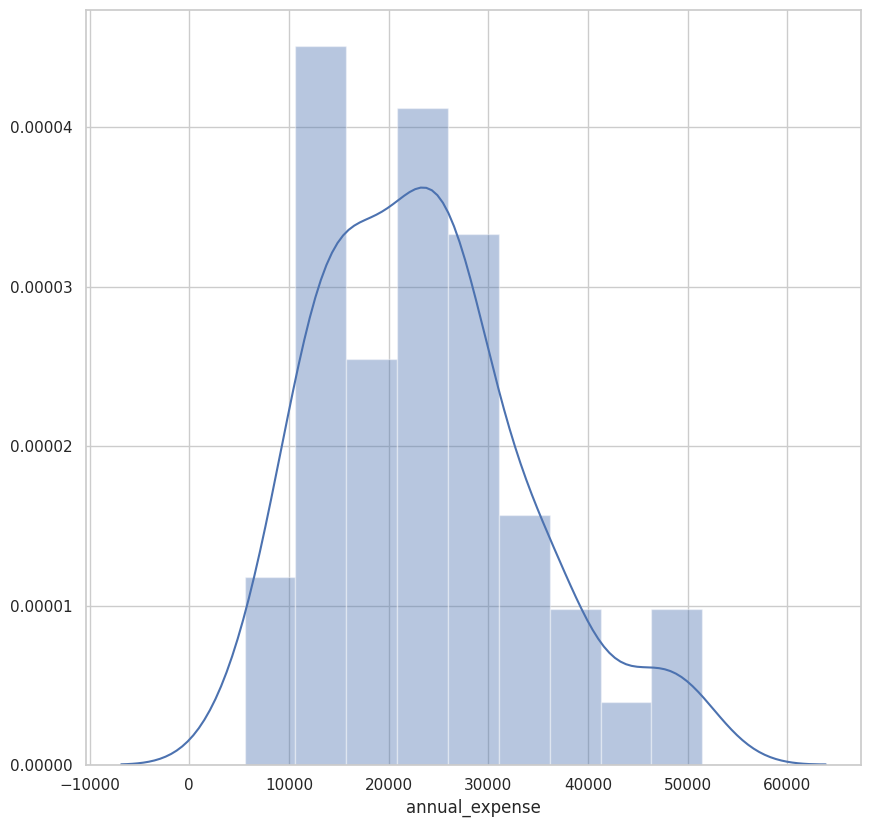

In [479]:
fig = plt.figure(figsize = (10, 10))
ax = sns.distplot(df_train.annual_expense)

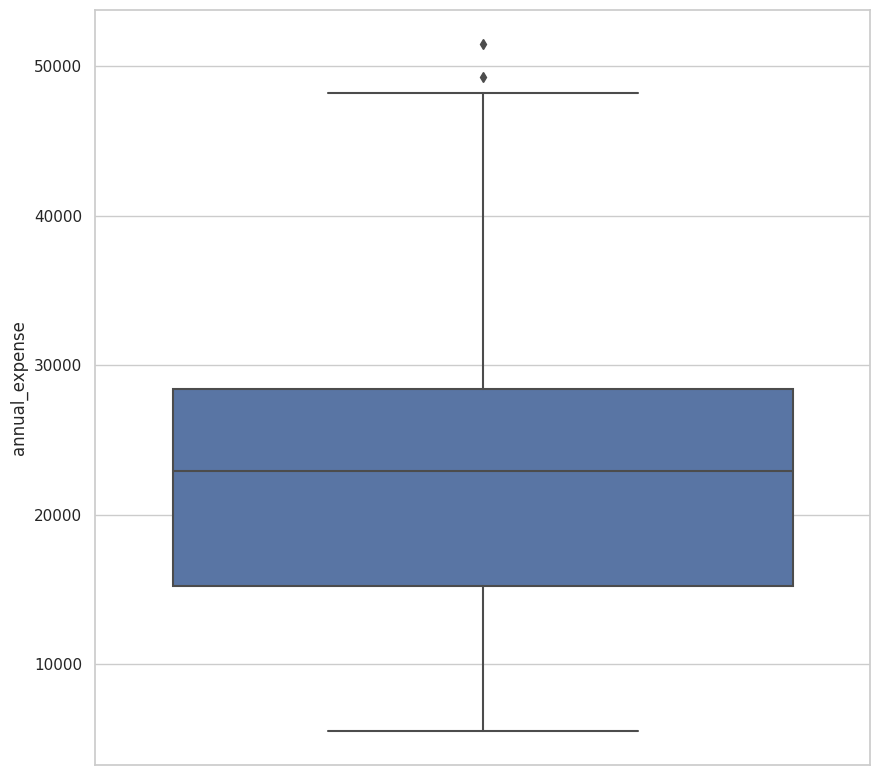

In [483]:
fig = plt.figure(figsize = (10, 10))
ax = sns.boxplot(y = df_train.annual_expense)

- Most of the customers are having annual expenses in between 15k AUD and 25k AUD
- The avg annual expense is 23500.
- 90% of the customers are having annual expense less than 37000.

In [502]:
df_train.corr()

,annual_salary,age,annual_expense
annual_salary,1.000000,-0.052869,0.379276
age,-0.052869,1.000000,-0.087196
annual_expense,0.379276,-0.087196,1.000000


- We can see that annual_salary is correlated with annual_expense.

<Figure size 1000x1000 with 0 Axes>

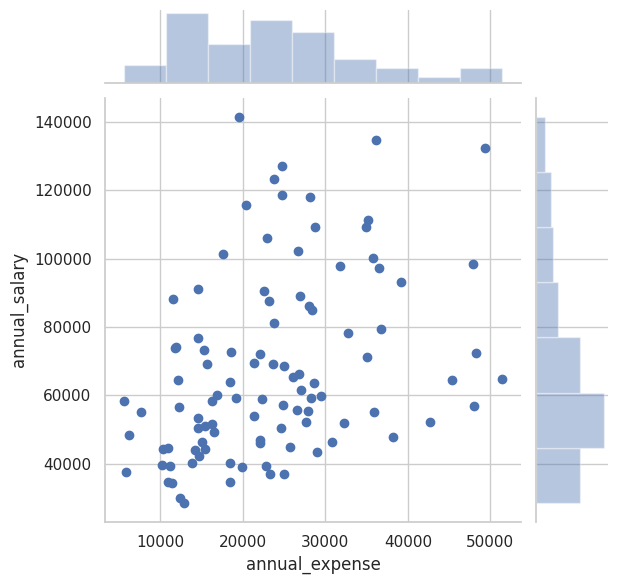

In [485]:
fig = plt.figure(figsize = (10,10))
ax = sns.jointplot(x = df_train.annual_expense, y = df_train.annual_salary)

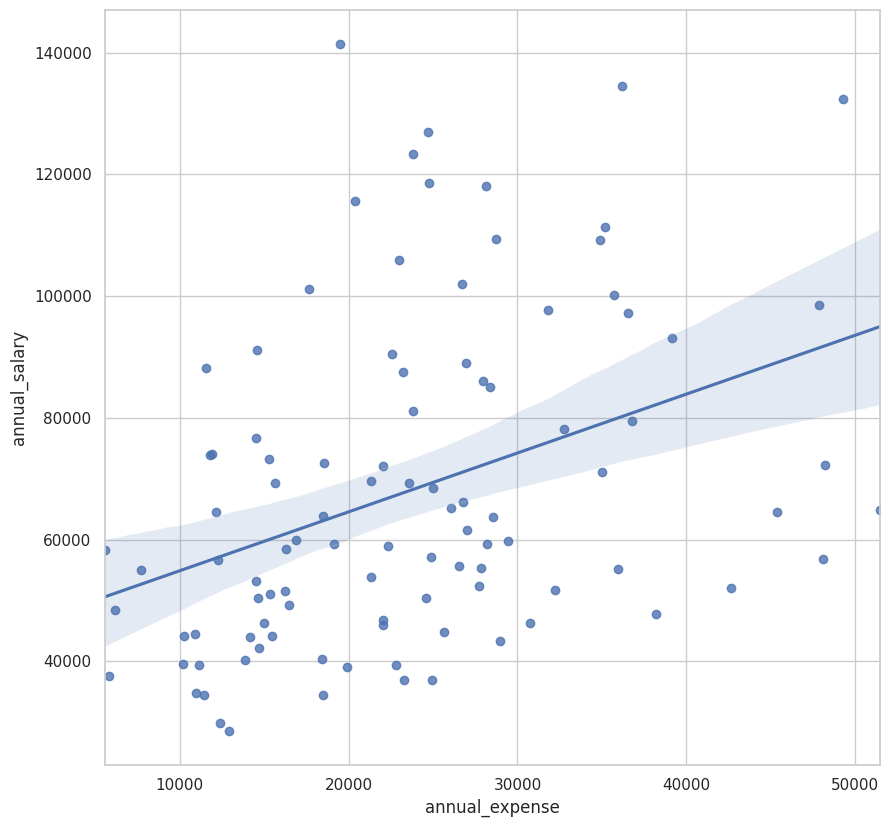

In [500]:
fig = plt.figure(figsize = (10,10))
ax = sns.regplot(x = 'annual_expense', y = 'annual_salary', data = df_train)

- We can see that the annual_salary is higly dependent on annual_expense in the range 40k-80k.

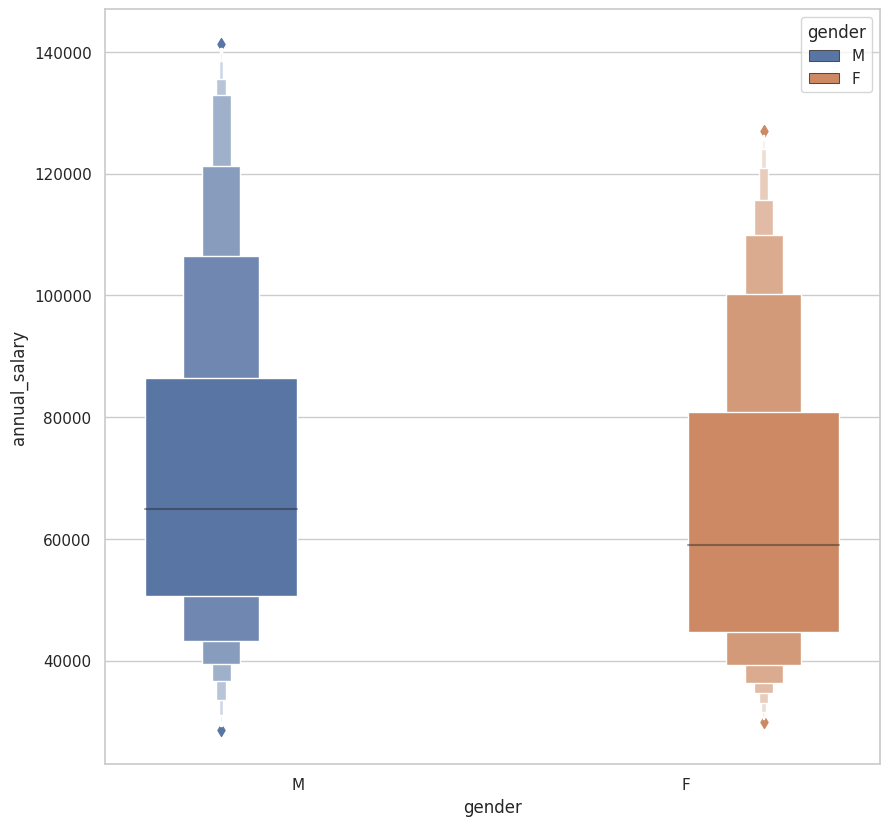

In [497]:
fig = plt.figure(figsize = (10,10))
ax = sns.boxenplot(x = df_train.gender, y = df_train.annual_salary, hue = df_train.gender)

In [511]:
encode = preprocessing.LabelEncoder()

In [512]:
df_train.gender = encode.fit_transform(df_train.gender)

In [514]:
df_train

,annual_salary,gender,age,annual_expense
customer_id,,,,
CUS-1462656821,109310.60,1,23.0,28734.20
CUS-2500783281,91082.88,0,23.0,14550.00
CUS-326006476,55068.16,1,22.0,7683.72
CUS-1433879684,39426.24,1,24.0,22827.20
CUS-4123612273,59810.24,0,43.0,29438.24
...,...,...,...,...
CUS-1816693151,141375.68,1,40.0,19486.48
CUS-497688347,58930.80,0,30.0,22315.32
CUS-423725039,44550.72,0,24.0,10905.76


In [773]:
x = df_train.drop(columns = ['annual_salary'], axis = 1)  

In [774]:
y = df_train.annual_salary

In [775]:
x = preprocessing.scale(x)

In [808]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2)

In [777]:
regressor = LinearRegression()

In [778]:
regressor.fit(x_train, y_train)

LinearRegression()

In [779]:
accuracy = regressor.score(x_test, y_test)
print(accuracy)

0.11827883101436776


In [809]:
dt_regressor = DecisionTreeRegressor()

In [810]:
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [811]:
accuracy = dt_regressor.score(x_test, y_test)
print(accuracy)

-0.9235146641318126
